## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

### jieba分词对百科内容进行清洗

In [1]:
import jieba
import re
def token(string):
    return re.findall('\w+', string)

def jieba_deal(orign_file, save_file):
    file = open(orign_file,"r",encoding='utf-8')
    output = open(save_file,"w+",encoding='utf-8')
    content_line = file.readline()
    while content_line != '':
        #print(content_line[:10])
        if content_line.startswith('<doc id'):
            #print(content_line)
            ss = ''
            content_line = file.readline()
            content_line = file.readline()
        if content_line.startswith('</doc>'):
            ss = ss.strip()
            ss = ''.join(token(str(ss))) #清洗标点或其他符号，保留存文本
            words = jieba.cut(ss)
            content = ''
            for word in words:
                content += word + ' '
            output.write(content+"\n") #每篇文章内容用换行符分隔          
        ss += content_line.strip('\n')
        content_line = file.readline()
        
    file.close()
    output.close()

In [27]:
jieba_deal('test.txt', 'test_result.txt')

In [38]:
#运行很长时间
for i in range(3):
    file = 'E:\\MYGIT\\Word2Vec\\wikiextractor-master\\zhwiki\\AA\\'+ "wiki_0"+ str(i)+ '_new'
    save_file = 'E:\\MYGIT\\Word2Vec\\wikiextractor-master\\zhwiki\\AA\\'+ 'wiki_0'+str(i)+'_formated'
    jieba_deal(file, save_file)

In [5]:
#将处理好的文件合并成一个文件
save_file = 'E:\\MYGIT\\Word2Vec\\wikiextractor-master\\zhwiki\\AA\\'+ 'word2vex_trainning_data'
output = open(save_file,"w+",encoding='utf-8')
for i in range(3):
    file = 'E:\\MYGIT\\Word2Vec\\wikiextractor-master\\zhwiki\\AA\\'+ 'wiki_0'+str(i)+'_formated'
    with open(file,'r',encoding='utf-8') as f:
        line = f.readline()
        while line != '':
            output.write(line)
            line = f.readline()
            
output.close()

### 使用Gensim进行训练

In [4]:
from gensim.models import word2vec
from gensim.models import Word2Vec
import gensim

In [2]:
help(gensim.models)

Help on package gensim.models in gensim:

NAME
    gensim.models

DESCRIPTION
    This package contains algorithms for extracting document representations from their raw
    bag-of-word counts.

PACKAGE CONTENTS
    _utils_any2vec
    atmodel
    base_any2vec
    basemodel
    callbacks
    coherencemodel
    deprecated (package)
    doc2vec
    doc2vec_inner
    fasttext
    fasttext_inner
    hdpmodel
    keyedvectors
    lda_dispatcher
    lda_worker
    ldamodel
    ldamulticore
    ldaseqmodel
    logentropy_model
    lsi_dispatcher
    lsi_worker
    lsimodel
    normmodel
    phrases
    poincare
    rpmodel
    tfidfmodel
    translation_matrix
    utils_any2vec
    word2vec
    word2vec_inner
    wrappers (package)

CLASSES
    gensim.interfaces.TransformationABC(gensim.utils.SaveLoad)
        VocabTransform
    
    class VocabTransform(gensim.interfaces.TransformationABC)
     |  VocabTransform(old2new, id2token=None)
     |  
     |  Remap feature ids to new values.
     | 

In [2]:
#just for test to see if it works
sentences = word2vec.LineSentence('E:\\MYGIT\\Word2Vec\\wikiextractor-master\\zhwiki\\AA\\test')
model = Word2Vec(sentences, size=250, window=5, min_count=1, workers=4, sg =1)
model.save("word2vec.model")

D:\Design Software\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [3]:
import logging
logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s",level=logging.INFO)
sentences = word2vec.LineSentence('E:\\MYGIT\\Word2Vec\\wikiextractor-master\\zhwiki\\AA\\word2vex_trainning_data')
model = Word2Vec(sentences, size=250, window=5, min_count=1, workers=4, sg =1)
model.save("word2vec.model")

2019-07-30 15:52:15,091:WARNING:consider setting layer size to a multiple of 4 for greater performance
2019-07-30 15:52:15,095:INFO:collecting all words and their counts
2019-07-30 15:52:15,098:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-07-30 15:52:20,731:INFO:PROGRESS: at sentence #10000, processed 11244421 words, keeping 450461 word types
2019-07-30 15:52:24,134:INFO:PROGRESS: at sentence #20000, processed 18574694 words, keeping 632506 word types
2019-07-30 15:52:27,030:INFO:PROGRESS: at sentence #30000, processed 24682910 words, keeping 778687 word types
2019-07-30 15:52:29,903:INFO:PROGRESS: at sentence #40000, processed 30060942 words, keeping 893663 word types
2019-07-30 15:52:32,279:INFO:PROGRESS: at sentence #50000, processed 34714366 words, keeping 991913 word types
2019-07-30 15:52:35,893:INFO:PROGRESS: at sentence #60000, processed 39296391 words, keeping 1086196 word types
2019-07-30 15:52:37,841:INFO:PROGRESS: at sentence #70000, processed

2019-07-30 15:53:30,803:INFO:PROGRESS: at sentence #710000, processed 142609833 words, keeping 2984378 word types
2019-07-30 15:53:31,589:INFO:PROGRESS: at sentence #720000, processed 144174949 words, keeping 3005168 word types
2019-07-30 15:53:32,499:INFO:PROGRESS: at sentence #730000, processed 145914523 words, keeping 3027789 word types
2019-07-30 15:53:33,398:INFO:PROGRESS: at sentence #740000, processed 147448101 words, keeping 3047679 word types
2019-07-30 15:53:34,261:INFO:PROGRESS: at sentence #750000, processed 149096889 words, keeping 3068384 word types
2019-07-30 15:53:35,342:INFO:PROGRESS: at sentence #760000, processed 151212508 words, keeping 3098532 word types
2019-07-30 15:53:36,262:INFO:PROGRESS: at sentence #770000, processed 152885650 words, keeping 3125458 word types
2019-07-30 15:53:37,098:INFO:PROGRESS: at sentence #780000, processed 154427814 words, keeping 3147494 word types
2019-07-30 15:53:38,134:INFO:PROGRESS: at sentence #790000, processed 156286283 words, k

2019-07-30 15:57:04,557:INFO:EPOCH 1 - PROGRESS: at 0.11% examples, 40262 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:57:05,644:INFO:EPOCH 1 - PROGRESS: at 0.11% examples, 41299 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:57:07,716:INFO:EPOCH 1 - PROGRESS: at 0.12% examples, 41386 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:57:09,192:INFO:EPOCH 1 - PROGRESS: at 0.12% examples, 41345 words/s, in_qsize 7, out_qsize 1
2019-07-30 15:57:10,252:INFO:EPOCH 1 - PROGRESS: at 0.13% examples, 41043 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:57:11,266:INFO:EPOCH 1 - PROGRESS: at 0.13% examples, 41844 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:57:12,364:INFO:EPOCH 1 - PROGRESS: at 0.14% examples, 42462 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:57:13,389:INFO:EPOCH 1 - PROGRESS: at 0.15% examples, 43328 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:57:14,423:INFO:EPOCH 1 - PROGRESS: at 0.16% examples, 44166 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:57:15,546:INFO:EPOCH 1 

2019-07-30 15:58:28,245:INFO:EPOCH 1 - PROGRESS: at 0.83% examples, 69179 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:58:29,369:INFO:EPOCH 1 - PROGRESS: at 0.84% examples, 69460 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:58:30,399:INFO:EPOCH 1 - PROGRESS: at 0.85% examples, 69710 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:58:31,522:INFO:EPOCH 1 - PROGRESS: at 0.86% examples, 69890 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:58:32,589:INFO:EPOCH 1 - PROGRESS: at 0.87% examples, 70106 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:58:33,713:INFO:EPOCH 1 - PROGRESS: at 0.89% examples, 70300 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:58:34,725:INFO:EPOCH 1 - PROGRESS: at 0.90% examples, 70523 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:58:35,746:INFO:EPOCH 1 - PROGRESS: at 0.92% examples, 70743 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:58:36,810:INFO:EPOCH 1 - PROGRESS: at 0.93% examples, 70873 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:58:37,869:INFO:EPOCH 1 

2019-07-30 15:59:50,358:INFO:EPOCH 1 - PROGRESS: at 1.92% examples, 78830 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:59:51,439:INFO:EPOCH 1 - PROGRESS: at 1.94% examples, 78918 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:59:52,499:INFO:EPOCH 1 - PROGRESS: at 1.96% examples, 78992 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:59:53,540:INFO:EPOCH 1 - PROGRESS: at 1.98% examples, 79077 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:59:54,565:INFO:EPOCH 1 - PROGRESS: at 2.00% examples, 79145 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:59:55,606:INFO:EPOCH 1 - PROGRESS: at 2.01% examples, 79242 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:59:56,919:INFO:EPOCH 1 - PROGRESS: at 2.04% examples, 79327 words/s, in_qsize 8, out_qsize 0
2019-07-30 15:59:58,022:INFO:EPOCH 1 - PROGRESS: at 2.06% examples, 79416 words/s, in_qsize 7, out_qsize 0
2019-07-30 15:59:59,061:INFO:EPOCH 1 - PROGRESS: at 2.08% examples, 79480 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:00:00,096:INFO:EPOCH 1 

2019-07-30 16:01:13,037:INFO:EPOCH 1 - PROGRESS: at 3.27% examples, 82720 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:01:14,094:INFO:EPOCH 1 - PROGRESS: at 3.29% examples, 82783 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:01:15,163:INFO:EPOCH 1 - PROGRESS: at 3.31% examples, 82736 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:01:16,277:INFO:EPOCH 1 - PROGRESS: at 3.32% examples, 82804 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:01:17,329:INFO:EPOCH 1 - PROGRESS: at 3.35% examples, 82831 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:01:18,400:INFO:EPOCH 1 - PROGRESS: at 3.37% examples, 82856 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:01:19,403:INFO:EPOCH 1 - PROGRESS: at 3.39% examples, 82950 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:01:20,442:INFO:EPOCH 1 - PROGRESS: at 3.41% examples, 82990 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:01:21,477:INFO:EPOCH 1 - PROGRESS: at 3.43% examples, 83021 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:01:22,624:INFO:EPOCH 1 

2019-07-30 16:02:35,189:INFO:EPOCH 1 - PROGRESS: at 4.96% examples, 85115 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:02:36,208:INFO:EPOCH 1 - PROGRESS: at 4.99% examples, 85131 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:02:37,248:INFO:EPOCH 1 - PROGRESS: at 5.01% examples, 85185 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:02:38,263:INFO:EPOCH 1 - PROGRESS: at 5.03% examples, 85188 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:02:39,295:INFO:EPOCH 1 - PROGRESS: at 5.05% examples, 85212 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:02:40,323:INFO:EPOCH 1 - PROGRESS: at 5.07% examples, 85237 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:02:41,345:INFO:EPOCH 1 - PROGRESS: at 5.10% examples, 85267 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:02:42,372:INFO:EPOCH 1 - PROGRESS: at 5.12% examples, 85281 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:02:43,508:INFO:EPOCH 1 - PROGRESS: at 5.14% examples, 85291 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:02:44,531:INFO:EPOCH 1 

2019-07-30 16:03:57,429:INFO:EPOCH 1 - PROGRESS: at 7.07% examples, 86380 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:03:58,483:INFO:EPOCH 1 - PROGRESS: at 7.12% examples, 86398 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:03:59,483:INFO:EPOCH 1 - PROGRESS: at 7.14% examples, 86397 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:04:00,609:INFO:EPOCH 1 - PROGRESS: at 7.17% examples, 86446 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:04:01,613:INFO:EPOCH 1 - PROGRESS: at 7.21% examples, 86486 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:04:02,681:INFO:EPOCH 1 - PROGRESS: at 7.24% examples, 86500 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:04:03,683:INFO:EPOCH 1 - PROGRESS: at 7.27% examples, 86521 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:04:04,690:INFO:EPOCH 1 - PROGRESS: at 7.31% examples, 86547 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:04:05,692:INFO:EPOCH 1 - PROGRESS: at 7.34% examples, 86558 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:04:06,771:INFO:EPOCH 1 

2019-07-30 16:05:18,303:INFO:EPOCH 1 - PROGRESS: at 9.84% examples, 87989 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:05:19,317:INFO:EPOCH 1 - PROGRESS: at 9.86% examples, 88022 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:05:20,403:INFO:EPOCH 1 - PROGRESS: at 9.89% examples, 88038 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:05:21,443:INFO:EPOCH 1 - PROGRESS: at 9.92% examples, 88066 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:05:22,450:INFO:EPOCH 1 - PROGRESS: at 9.95% examples, 88081 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:05:23,453:INFO:EPOCH 1 - PROGRESS: at 9.98% examples, 88095 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:05:24,525:INFO:EPOCH 1 - PROGRESS: at 10.01% examples, 88118 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:05:25,670:INFO:EPOCH 1 - PROGRESS: at 10.05% examples, 88129 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:05:26,710:INFO:EPOCH 1 - PROGRESS: at 10.08% examples, 88170 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:05:27,754:INFO:EPOCH

2019-07-30 16:06:38,546:INFO:EPOCH 1 - PROGRESS: at 12.40% examples, 89056 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:06:39,655:INFO:EPOCH 1 - PROGRESS: at 12.43% examples, 89063 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:06:40,664:INFO:EPOCH 1 - PROGRESS: at 12.47% examples, 89079 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:06:41,700:INFO:EPOCH 1 - PROGRESS: at 12.51% examples, 89102 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:06:42,743:INFO:EPOCH 1 - PROGRESS: at 12.55% examples, 89132 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:06:43,851:INFO:EPOCH 1 - PROGRESS: at 12.58% examples, 89137 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:06:44,883:INFO:EPOCH 1 - PROGRESS: at 12.62% examples, 89171 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:06:45,895:INFO:EPOCH 1 - PROGRESS: at 12.65% examples, 89176 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:06:46,952:INFO:EPOCH 1 - PROGRESS: at 12.69% examples, 89201 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:06:48,085:INFO

2019-07-30 16:07:59,221:INFO:EPOCH 1 - PROGRESS: at 15.32% examples, 89916 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:08:00,228:INFO:EPOCH 1 - PROGRESS: at 15.36% examples, 89928 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:08:01,233:INFO:EPOCH 1 - PROGRESS: at 15.40% examples, 89952 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:08:02,276:INFO:EPOCH 1 - PROGRESS: at 15.44% examples, 89966 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:08:03,351:INFO:EPOCH 1 - PROGRESS: at 15.48% examples, 89976 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:08:04,503:INFO:EPOCH 1 - PROGRESS: at 15.52% examples, 89965 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:08:05,723:INFO:EPOCH 1 - PROGRESS: at 15.55% examples, 89958 words/s, in_qsize 6, out_qsize 2
2019-07-30 16:08:06,770:INFO:EPOCH 1 - PROGRESS: at 15.59% examples, 89969 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:08:07,884:INFO:EPOCH 1 - PROGRESS: at 15.63% examples, 89982 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:08:08,947:INFO

2019-07-30 16:09:19,951:INFO:EPOCH 1 - PROGRESS: at 18.53% examples, 90424 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:09:21,039:INFO:EPOCH 1 - PROGRESS: at 18.57% examples, 90433 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:09:22,042:INFO:EPOCH 1 - PROGRESS: at 18.61% examples, 90453 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:09:23,048:INFO:EPOCH 1 - PROGRESS: at 18.66% examples, 90469 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:09:24,140:INFO:EPOCH 1 - PROGRESS: at 18.69% examples, 90470 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:09:25,218:INFO:EPOCH 1 - PROGRESS: at 18.73% examples, 90476 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:09:26,269:INFO:EPOCH 1 - PROGRESS: at 18.79% examples, 90490 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:09:27,272:INFO:EPOCH 1 - PROGRESS: at 18.83% examples, 90504 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:09:28,350:INFO:EPOCH 1 - PROGRESS: at 18.88% examples, 90526 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:09:29,365:INFO

2019-07-30 16:10:45,122:INFO:EPOCH 1 - PROGRESS: at 22.93% examples, 90151 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:10:46,229:INFO:EPOCH 1 - PROGRESS: at 22.97% examples, 90168 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:10:47,228:INFO:EPOCH 1 - PROGRESS: at 23.00% examples, 90181 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:10:48,242:INFO:EPOCH 1 - PROGRESS: at 23.04% examples, 90195 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:10:49,256:INFO:EPOCH 1 - PROGRESS: at 23.09% examples, 90208 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:10:50,270:INFO:EPOCH 1 - PROGRESS: at 23.13% examples, 90227 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:10:51,284:INFO:EPOCH 1 - PROGRESS: at 23.17% examples, 90241 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:10:52,298:INFO:EPOCH 1 - PROGRESS: at 23.21% examples, 90271 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:10:53,343:INFO:EPOCH 1 - PROGRESS: at 23.25% examples, 90287 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:10:54,435:INFO

2019-07-30 16:12:05,618:INFO:EPOCH 1 - PROGRESS: at 27.38% examples, 91446 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:12:06,694:INFO:EPOCH 1 - PROGRESS: at 27.43% examples, 91456 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:12:07,708:INFO:EPOCH 1 - PROGRESS: at 27.51% examples, 91474 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:12:08,972:INFO:EPOCH 1 - PROGRESS: at 27.57% examples, 91482 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:12:09,986:INFO:EPOCH 1 - PROGRESS: at 27.63% examples, 91505 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:12:11,000:INFO:EPOCH 1 - PROGRESS: at 27.68% examples, 91518 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:12:12,014:INFO:EPOCH 1 - PROGRESS: at 27.76% examples, 91541 words/s, in_qsize 6, out_qsize 0
2019-07-30 16:12:13,059:INFO:EPOCH 1 - PROGRESS: at 27.80% examples, 91557 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:12:14,057:INFO:EPOCH 1 - PROGRESS: at 27.85% examples, 91570 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:12:15,196:INFO

2019-07-30 16:13:27,908:INFO:EPOCH 1 - PROGRESS: at 31.29% examples, 92202 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:13:29,000:INFO:EPOCH 1 - PROGRESS: at 31.36% examples, 92214 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:13:29,998:INFO:EPOCH 1 - PROGRESS: at 31.42% examples, 92239 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:13:31,028:INFO:EPOCH 1 - PROGRESS: at 31.47% examples, 92246 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:13:32,026:INFO:EPOCH 1 - PROGRESS: at 31.52% examples, 92257 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:13:33,071:INFO:EPOCH 1 - PROGRESS: at 31.57% examples, 92264 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:13:34,085:INFO:EPOCH 1 - PROGRESS: at 31.63% examples, 92280 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:13:35,146:INFO:EPOCH 1 - PROGRESS: at 31.67% examples, 92287 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:13:36,191:INFO:EPOCH 1 - PROGRESS: at 31.73% examples, 92295 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:13:37,252:INFO

2019-07-30 16:14:47,546:INFO:EPOCH 1 - PROGRESS: at 35.89% examples, 93069 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:14:48,685:INFO:EPOCH 1 - PROGRESS: at 35.97% examples, 93077 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:14:49,699:INFO:EPOCH 1 - PROGRESS: at 36.04% examples, 93087 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:14:50,697:INFO:EPOCH 1 - PROGRESS: at 36.11% examples, 93105 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:14:51,727:INFO:EPOCH 1 - PROGRESS: at 36.18% examples, 93115 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:14:52,741:INFO:EPOCH 1 - PROGRESS: at 36.25% examples, 93123 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:14:53,786:INFO:EPOCH 1 - PROGRESS: at 36.33% examples, 93137 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:14:54,816:INFO:EPOCH 1 - PROGRESS: at 36.42% examples, 93154 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:14:55,939:INFO:EPOCH 1 - PROGRESS: at 36.52% examples, 93162 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:14:56,984:INFO

2019-07-30 16:16:08,214:INFO:EPOCH 1 - PROGRESS: at 47.54% examples, 94079 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:16:09,415:INFO:EPOCH 1 - PROGRESS: at 47.60% examples, 94079 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:16:10,445:INFO:EPOCH 1 - PROGRESS: at 48.11% examples, 94118 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:16:11,459:INFO:EPOCH 1 - PROGRESS: at 48.34% examples, 94141 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:16:12,488:INFO:EPOCH 1 - PROGRESS: at 48.41% examples, 94149 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:16:13,611:INFO:EPOCH 1 - PROGRESS: at 48.52% examples, 94155 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:16:14,625:INFO:EPOCH 1 - PROGRESS: at 48.93% examples, 94187 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:16:15,858:INFO:EPOCH 1 - PROGRESS: at 49.27% examples, 94181 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:16:16,856:INFO:EPOCH 1 - PROGRESS: at 49.34% examples, 94179 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:16:17,964:INFO

2019-07-30 16:17:29,817:INFO:EPOCH 1 - PROGRESS: at 61.87% examples, 95041 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:17:30,847:INFO:EPOCH 1 - PROGRESS: at 61.94% examples, 95047 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:17:31,861:INFO:EPOCH 1 - PROGRESS: at 62.10% examples, 95076 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:17:33,016:INFO:EPOCH 1 - PROGRESS: at 62.18% examples, 95076 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:17:34,030:INFO:EPOCH 1 - PROGRESS: at 62.37% examples, 95099 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:17:35,044:INFO:EPOCH 1 - PROGRESS: at 62.43% examples, 95100 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:17:36,089:INFO:EPOCH 1 - PROGRESS: at 62.48% examples, 95109 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:17:37,150:INFO:EPOCH 1 - PROGRESS: at 62.54% examples, 95116 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:17:38,242:INFO:EPOCH 1 - PROGRESS: at 62.60% examples, 95121 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:17:39,271:INFO

2019-07-30 16:18:49,814:INFO:EPOCH 1 - PROGRESS: at 67.41% examples, 95516 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:50,813:INFO:EPOCH 1 - PROGRESS: at 67.48% examples, 95528 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:51,858:INFO:EPOCH 1 - PROGRESS: at 67.53% examples, 95512 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:52,856:INFO:EPOCH 1 - PROGRESS: at 67.61% examples, 95519 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:53,886:INFO:EPOCH 1 - PROGRESS: at 67.69% examples, 95527 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:54,916:INFO:EPOCH 1 - PROGRESS: at 67.76% examples, 95538 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:56,008:INFO:EPOCH 1 - PROGRESS: at 67.83% examples, 95524 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:57,084:INFO:EPOCH 1 - PROGRESS: at 67.90% examples, 95537 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:18:58,145:INFO:EPOCH 1 - PROGRESS: at 67.96% examples, 95536 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:18:59,206:INFO

2019-07-30 16:20:09,936:INFO:EPOCH 1 - PROGRESS: at 72.31% examples, 95860 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:20:11,059:INFO:EPOCH 1 - PROGRESS: at 72.38% examples, 95867 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:20:12,089:INFO:EPOCH 1 - PROGRESS: at 72.46% examples, 95871 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:20:13,134:INFO:EPOCH 1 - PROGRESS: at 72.54% examples, 95885 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:20:14,242:INFO:EPOCH 1 - PROGRESS: at 72.61% examples, 95890 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:20:15,240:INFO:EPOCH 1 - PROGRESS: at 72.67% examples, 95896 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:20:16,270:INFO:EPOCH 1 - PROGRESS: at 72.76% examples, 95905 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:20:17,268:INFO:EPOCH 1 - PROGRESS: at 72.84% examples, 95910 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:20:18,282:INFO:EPOCH 1 - PROGRESS: at 72.86% examples, 95873 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:20:19,296:INFO

2019-07-30 16:21:35,612:INFO:EPOCH 1 - PROGRESS: at 77.24% examples, 95471 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:21:37,562:INFO:EPOCH 1 - PROGRESS: at 77.30% examples, 95417 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:21:39,808:INFO:EPOCH 1 - PROGRESS: at 77.35% examples, 95342 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:21:41,618:INFO:EPOCH 1 - PROGRESS: at 77.36% examples, 95234 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:21:42,788:INFO:EPOCH 1 - PROGRESS: at 77.42% examples, 95242 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:21:43,864:INFO:EPOCH 1 - PROGRESS: at 77.46% examples, 95245 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:21:44,894:INFO:EPOCH 1 - PROGRESS: at 77.52% examples, 95254 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:21:45,923:INFO:EPOCH 1 - PROGRESS: at 77.60% examples, 95264 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:21:46,937:INFO:EPOCH 1 - PROGRESS: at 77.67% examples, 95267 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:21:47,967:INFO

2019-07-30 16:22:58,697:INFO:EPOCH 1 - PROGRESS: at 82.65% examples, 95513 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:22:59,867:INFO:EPOCH 1 - PROGRESS: at 82.72% examples, 95509 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:23:00,975:INFO:EPOCH 1 - PROGRESS: at 82.80% examples, 95516 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:23:01,989:INFO:EPOCH 1 - PROGRESS: at 82.87% examples, 95521 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:23:03,112:INFO:EPOCH 1 - PROGRESS: at 82.92% examples, 95521 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:23:04,251:INFO:EPOCH 1 - PROGRESS: at 82.98% examples, 95518 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:23:05,421:INFO:EPOCH 1 - PROGRESS: at 83.06% examples, 95515 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:23:06,466:INFO:EPOCH 1 - PROGRESS: at 83.12% examples, 95529 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:23:07,542:INFO:EPOCH 1 - PROGRESS: at 83.17% examples, 95531 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:23:08,853:INFO

2019-07-30 16:24:19,069:INFO:EPOCH 1 - PROGRESS: at 87.65% examples, 95790 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:24:20,114:INFO:EPOCH 1 - PROGRESS: at 87.72% examples, 95780 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:24:21,206:INFO:EPOCH 1 - PROGRESS: at 87.79% examples, 95779 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:24:22,313:INFO:EPOCH 1 - PROGRESS: at 87.82% examples, 95742 words/s, in_qsize 8, out_qsize 1
2019-07-30 16:24:23,343:INFO:EPOCH 1 - PROGRESS: at 87.90% examples, 95756 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:24:24,357:INFO:EPOCH 1 - PROGRESS: at 87.96% examples, 95759 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:24:25,387:INFO:EPOCH 1 - PROGRESS: at 88.03% examples, 95761 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:24:26,385:INFO:EPOCH 1 - PROGRESS: at 88.08% examples, 95767 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:24:27,415:INFO:EPOCH 1 - PROGRESS: at 88.13% examples, 95777 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:24:28,585:INFO

2019-07-30 16:25:43,371:INFO:EPOCH 1 - PROGRESS: at 92.65% examples, 95630 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:25:44,401:INFO:EPOCH 1 - PROGRESS: at 92.71% examples, 95635 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:25:45,430:INFO:EPOCH 1 - PROGRESS: at 92.79% examples, 95642 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:25:46,616:INFO:EPOCH 1 - PROGRESS: at 92.86% examples, 95644 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:25:47,661:INFO:EPOCH 1 - PROGRESS: at 92.96% examples, 95651 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:25:48,722:INFO:EPOCH 1 - PROGRESS: at 93.02% examples, 95656 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:25:49,720:INFO:EPOCH 1 - PROGRESS: at 93.07% examples, 95665 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:25:50,734:INFO:EPOCH 1 - PROGRESS: at 93.12% examples, 95669 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:25:51,748:INFO:EPOCH 1 - PROGRESS: at 93.19% examples, 95670 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:25:52,762:INFO

2019-07-30 16:27:11,590:INFO:EPOCH 1 - PROGRESS: at 97.24% examples, 95221 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:27:12,636:INFO:EPOCH 1 - PROGRESS: at 97.32% examples, 95227 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:27:13,634:INFO:EPOCH 1 - PROGRESS: at 97.37% examples, 95227 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:27:14,710:INFO:EPOCH 1 - PROGRESS: at 97.44% examples, 95229 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:27:15,724:INFO:EPOCH 1 - PROGRESS: at 97.51% examples, 95233 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:27:16,785:INFO:EPOCH 1 - PROGRESS: at 97.60% examples, 95238 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:27:17,862:INFO:EPOCH 1 - PROGRESS: at 97.68% examples, 95233 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:27:18,891:INFO:EPOCH 1 - PROGRESS: at 97.76% examples, 95241 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:27:19,952:INFO:EPOCH 1 - PROGRESS: at 97.83% examples, 95242 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:27:21,075:INFO

2019-07-30 16:28:28,032:INFO:EPOCH 2 - PROGRESS: at 0.25% examples, 103522 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:29,109:INFO:EPOCH 2 - PROGRESS: at 0.25% examples, 103666 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:30,232:INFO:EPOCH 2 - PROGRESS: at 0.26% examples, 103576 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:31,324:INFO:EPOCH 2 - PROGRESS: at 0.27% examples, 103645 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:32,322:INFO:EPOCH 2 - PROGRESS: at 0.28% examples, 103895 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:33,414:INFO:EPOCH 2 - PROGRESS: at 0.29% examples, 103616 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:34,428:INFO:EPOCH 2 - PROGRESS: at 0.30% examples, 103834 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:35,583:INFO:EPOCH 2 - PROGRESS: at 0.31% examples, 103403 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:28:36,644:INFO:EPOCH 2 - PROGRESS: at 0.32% examples, 103146 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:28:37,736:INFO

2019-07-30 16:29:48,887:INFO:EPOCH 2 - PROGRESS: at 1.17% examples, 102162 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:49,901:INFO:EPOCH 2 - PROGRESS: at 1.19% examples, 102186 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:51,009:INFO:EPOCH 2 - PROGRESS: at 1.20% examples, 102227 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:52,023:INFO:EPOCH 2 - PROGRESS: at 1.21% examples, 102245 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:29:53,162:INFO:EPOCH 2 - PROGRESS: at 1.23% examples, 102237 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:54,254:INFO:EPOCH 2 - PROGRESS: at 1.24% examples, 102261 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:55,299:INFO:EPOCH 2 - PROGRESS: at 1.25% examples, 102277 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:56,313:INFO:EPOCH 2 - PROGRESS: at 1.27% examples, 102354 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:57,343:INFO:EPOCH 2 - PROGRESS: at 1.28% examples, 102390 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:29:58,403:INFO

2019-07-30 16:31:08,869:INFO:EPOCH 2 - PROGRESS: at 2.49% examples, 102535 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:09,930:INFO:EPOCH 2 - PROGRESS: at 2.51% examples, 102493 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:11,022:INFO:EPOCH 2 - PROGRESS: at 2.53% examples, 102509 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:12,067:INFO:EPOCH 2 - PROGRESS: at 2.55% examples, 102523 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:13,128:INFO:EPOCH 2 - PROGRESS: at 2.56% examples, 102505 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:14,157:INFO:EPOCH 2 - PROGRESS: at 2.58% examples, 102524 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:15,265:INFO:EPOCH 2 - PROGRESS: at 2.60% examples, 102517 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:16,310:INFO:EPOCH 2 - PROGRESS: at 2.61% examples, 102516 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:17,386:INFO:EPOCH 2 - PROGRESS: at 2.63% examples, 102518 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:31:18,447:INFO

2019-07-30 16:32:29,224:INFO:EPOCH 2 - PROGRESS: at 4.06% examples, 102464 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:30,301:INFO:EPOCH 2 - PROGRESS: at 4.10% examples, 102474 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:31,315:INFO:EPOCH 2 - PROGRESS: at 4.12% examples, 102449 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:32,313:INFO:EPOCH 2 - PROGRESS: at 4.14% examples, 102436 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:33,343:INFO:EPOCH 2 - PROGRESS: at 4.16% examples, 102436 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:34,372:INFO:EPOCH 2 - PROGRESS: at 4.18% examples, 102446 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:35,402:INFO:EPOCH 2 - PROGRESS: at 4.20% examples, 102443 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:32:36,541:INFO:EPOCH 2 - PROGRESS: at 4.23% examples, 102420 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:37,586:INFO:EPOCH 2 - PROGRESS: at 4.25% examples, 102451 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:32:38,709:INFO

2019-07-30 16:33:50,953:INFO:EPOCH 2 - PROGRESS: at 5.95% examples, 101649 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:51,967:INFO:EPOCH 2 - PROGRESS: at 5.98% examples, 101661 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:53,028:INFO:EPOCH 2 - PROGRESS: at 6.00% examples, 101690 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:54,151:INFO:EPOCH 2 - PROGRESS: at 6.04% examples, 101681 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:55,321:INFO:EPOCH 2 - PROGRESS: at 6.07% examples, 101676 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:56,366:INFO:EPOCH 2 - PROGRESS: at 6.10% examples, 101728 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:57,474:INFO:EPOCH 2 - PROGRESS: at 6.13% examples, 101725 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:58,519:INFO:EPOCH 2 - PROGRESS: at 6.15% examples, 101726 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:33:59,642:INFO:EPOCH 2 - PROGRESS: at 6.18% examples, 101740 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:34:00,672:INFO

2019-07-30 16:35:12,510:INFO:EPOCH 2 - PROGRESS: at 8.85% examples, 101295 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:35:13,524:INFO:EPOCH 2 - PROGRESS: at 8.89% examples, 101319 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:35:14,897:INFO:EPOCH 2 - PROGRESS: at 8.94% examples, 101257 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:35:16,004:INFO:EPOCH 2 - PROGRESS: at 8.97% examples, 101251 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:35:17,018:INFO:EPOCH 2 - PROGRESS: at 9.01% examples, 101270 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:35:18,095:INFO:EPOCH 2 - PROGRESS: at 9.04% examples, 101280 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:35:19,124:INFO:EPOCH 2 - PROGRESS: at 9.07% examples, 101276 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:35:20,138:INFO:EPOCH 2 - PROGRESS: at 9.09% examples, 101264 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:35:21,262:INFO:EPOCH 2 - PROGRESS: at 9.14% examples, 101274 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:35:22,291:INFO

2019-07-30 16:36:34,410:INFO:EPOCH 2 - PROGRESS: at 11.44% examples, 100892 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:35,455:INFO:EPOCH 2 - PROGRESS: at 11.48% examples, 100895 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:36,563:INFO:EPOCH 2 - PROGRESS: at 11.51% examples, 100857 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:37,671:INFO:EPOCH 2 - PROGRESS: at 11.55% examples, 100848 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:38,700:INFO:EPOCH 2 - PROGRESS: at 11.59% examples, 100874 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:39,777:INFO:EPOCH 2 - PROGRESS: at 11.63% examples, 100874 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:40,947:INFO:EPOCH 2 - PROGRESS: at 11.66% examples, 100833 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:41,992:INFO:EPOCH 2 - PROGRESS: at 11.69% examples, 100849 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:43,021:INFO:EPOCH 2 - PROGRESS: at 11.73% examples, 100853 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:36:44

2019-07-30 16:37:57,465:INFO:EPOCH 2 - PROGRESS: at 14.29% examples, 99949 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:37:58,572:INFO:EPOCH 2 - PROGRESS: at 14.34% examples, 99955 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:37:59,789:INFO:EPOCH 2 - PROGRESS: at 14.38% examples, 99955 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:38:00,819:INFO:EPOCH 2 - PROGRESS: at 14.43% examples, 99983 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:38:01,833:INFO:EPOCH 2 - PROGRESS: at 14.48% examples, 99988 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:38:02,862:INFO:EPOCH 2 - PROGRESS: at 14.53% examples, 100001 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:38:03,876:INFO:EPOCH 2 - PROGRESS: at 14.57% examples, 100000 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:38:04,906:INFO:EPOCH 2 - PROGRESS: at 14.61% examples, 100005 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:38:05,904:INFO:EPOCH 2 - PROGRESS: at 14.65% examples, 100008 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:38:06,949:

2019-07-30 16:39:18,210:INFO:EPOCH 2 - PROGRESS: at 17.52% examples, 99854 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:19,224:INFO:EPOCH 2 - PROGRESS: at 17.57% examples, 99864 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:20,238:INFO:EPOCH 2 - PROGRESS: at 17.61% examples, 99854 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:21,377:INFO:EPOCH 2 - PROGRESS: at 17.66% examples, 99841 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:22,516:INFO:EPOCH 2 - PROGRESS: at 17.70% examples, 99768 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:23,592:INFO:EPOCH 2 - PROGRESS: at 17.75% examples, 99782 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:24,622:INFO:EPOCH 2 - PROGRESS: at 17.80% examples, 99791 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:25,636:INFO:EPOCH 2 - PROGRESS: at 17.83% examples, 99791 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:26,697:INFO:EPOCH 2 - PROGRESS: at 17.88% examples, 99800 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:39:27,695:INFO

2019-07-30 16:40:38,379:INFO:EPOCH 2 - PROGRESS: at 22.36% examples, 100315 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:40:39,393:INFO:EPOCH 2 - PROGRESS: at 22.40% examples, 100316 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:40:40,423:INFO:EPOCH 2 - PROGRESS: at 22.44% examples, 100339 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:40:41,655:INFO:EPOCH 2 - PROGRESS: at 22.50% examples, 100325 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:40:42,669:INFO:EPOCH 2 - PROGRESS: at 22.54% examples, 100338 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:40:43,683:INFO:EPOCH 2 - PROGRESS: at 22.58% examples, 100352 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:40:44,697:INFO:EPOCH 2 - PROGRESS: at 22.62% examples, 100364 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:40:45,773:INFO:EPOCH 2 - PROGRESS: at 22.66% examples, 100362 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:40:46,819:INFO:EPOCH 2 - PROGRESS: at 22.71% examples, 100377 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:40:47

2019-07-30 16:41:58,267:INFO:EPOCH 2 - PROGRESS: at 26.53% examples, 100832 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:41:59,265:INFO:EPOCH 2 - PROGRESS: at 26.58% examples, 100847 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:42:00,404:INFO:EPOCH 2 - PROGRESS: at 26.64% examples, 100843 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:42:01,449:INFO:EPOCH 2 - PROGRESS: at 26.68% examples, 100852 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:42:02,463:INFO:EPOCH 2 - PROGRESS: at 26.73% examples, 100864 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:42:03,461:INFO:EPOCH 2 - PROGRESS: at 26.78% examples, 100864 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:42:04,491:INFO:EPOCH 2 - PROGRESS: at 26.85% examples, 100868 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:42:05,505:INFO:EPOCH 2 - PROGRESS: at 26.92% examples, 100877 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:42:06,628:INFO:EPOCH 2 - PROGRESS: at 27.00% examples, 100889 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:42:07

2019-07-30 16:43:18,622:INFO:EPOCH 2 - PROGRESS: at 30.69% examples, 101232 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:43:19,683:INFO:EPOCH 2 - PROGRESS: at 30.74% examples, 101233 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:43:20,713:INFO:EPOCH 2 - PROGRESS: at 30.78% examples, 101233 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:43:21,727:INFO:EPOCH 2 - PROGRESS: at 30.83% examples, 101226 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:43:22,834:INFO:EPOCH 2 - PROGRESS: at 30.87% examples, 101225 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:43:23,880:INFO:EPOCH 2 - PROGRESS: at 30.92% examples, 101230 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:43:24,956:INFO:EPOCH 2 - PROGRESS: at 30.96% examples, 101235 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:43:25,970:INFO:EPOCH 2 - PROGRESS: at 31.01% examples, 101240 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:43:27,000:INFO:EPOCH 2 - PROGRESS: at 31.07% examples, 101252 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:43:28

2019-07-30 16:44:38,775:INFO:EPOCH 2 - PROGRESS: at 35.13% examples, 101481 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:44:39,945:INFO:EPOCH 2 - PROGRESS: at 35.19% examples, 101474 words/s, in_qsize 6, out_qsize 2
2019-07-30 16:44:40,959:INFO:EPOCH 2 - PROGRESS: at 35.25% examples, 101491 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:44:42,051:INFO:EPOCH 2 - PROGRESS: at 35.31% examples, 101495 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:44:43,159:INFO:EPOCH 2 - PROGRESS: at 35.37% examples, 101493 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:44:44,235:INFO:EPOCH 2 - PROGRESS: at 35.43% examples, 101504 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:44:45,296:INFO:EPOCH 2 - PROGRESS: at 35.51% examples, 101505 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:44:46,326:INFO:EPOCH 2 - PROGRESS: at 35.59% examples, 101512 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:44:47,371:INFO:EPOCH 2 - PROGRESS: at 35.65% examples, 101519 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:44:48

2019-07-30 16:46:01,315:INFO:EPOCH 2 - PROGRESS: at 46.23% examples, 101744 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:02,314:INFO:EPOCH 2 - PROGRESS: at 46.31% examples, 101757 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:46:03,312:INFO:EPOCH 2 - PROGRESS: at 46.37% examples, 101750 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:04,326:INFO:EPOCH 2 - PROGRESS: at 46.47% examples, 101762 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:05,418:INFO:EPOCH 2 - PROGRESS: at 46.54% examples, 101761 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:06,448:INFO:EPOCH 2 - PROGRESS: at 46.84% examples, 101778 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:07,462:INFO:EPOCH 2 - PROGRESS: at 46.91% examples, 101785 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:08,491:INFO:EPOCH 2 - PROGRESS: at 46.97% examples, 101794 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:09,614:INFO:EPOCH 2 - PROGRESS: at 47.05% examples, 101794 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:46:10

2019-07-30 16:47:22,357:INFO:EPOCH 2 - PROGRESS: at 61.07% examples, 102506 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:47:23,356:INFO:EPOCH 2 - PROGRESS: at 61.18% examples, 102514 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:47:24,432:INFO:EPOCH 2 - PROGRESS: at 61.28% examples, 102513 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:47:25,446:INFO:EPOCH 2 - PROGRESS: at 61.37% examples, 102516 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:47:26,460:INFO:EPOCH 2 - PROGRESS: at 61.42% examples, 102510 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:47:27,474:INFO:EPOCH 2 - PROGRESS: at 61.50% examples, 102517 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:47:28,488:INFO:EPOCH 2 - PROGRESS: at 61.56% examples, 102524 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:47:29,502:INFO:EPOCH 2 - PROGRESS: at 61.63% examples, 102525 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:47:30,500:INFO:EPOCH 2 - PROGRESS: at 61.71% examples, 102532 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:47:31

2019-07-30 16:48:42,229:INFO:EPOCH 2 - PROGRESS: at 66.79% examples, 102657 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:48:43,399:INFO:EPOCH 2 - PROGRESS: at 66.87% examples, 102652 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:48:44,413:INFO:EPOCH 2 - PROGRESS: at 66.94% examples, 102660 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:48:45,443:INFO:EPOCH 2 - PROGRESS: at 67.00% examples, 102655 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:48:46,457:INFO:EPOCH 2 - PROGRESS: at 67.07% examples, 102650 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:48:47,487:INFO:EPOCH 2 - PROGRESS: at 67.14% examples, 102659 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:48:48,501:INFO:EPOCH 2 - PROGRESS: at 67.20% examples, 102661 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:48:49,561:INFO:EPOCH 2 - PROGRESS: at 67.28% examples, 102659 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:48:50,653:INFO:EPOCH 2 - PROGRESS: at 67.35% examples, 102656 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:48:51

2019-07-30 16:50:01,712:INFO:EPOCH 2 - PROGRESS: at 71.80% examples, 102686 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:50:02,726:INFO:EPOCH 2 - PROGRESS: at 71.86% examples, 102692 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:50:03,755:INFO:EPOCH 2 - PROGRESS: at 71.94% examples, 102691 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:50:04,754:INFO:EPOCH 2 - PROGRESS: at 72.02% examples, 102693 words/s, in_qsize 6, out_qsize 1
2019-07-30 16:50:05,830:INFO:EPOCH 2 - PROGRESS: at 72.08% examples, 102697 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:50:06,844:INFO:EPOCH 2 - PROGRESS: at 72.13% examples, 102699 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:50:07,842:INFO:EPOCH 2 - PROGRESS: at 72.18% examples, 102694 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:50:08,872:INFO:EPOCH 2 - PROGRESS: at 72.24% examples, 102700 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:50:10,011:INFO:EPOCH 2 - PROGRESS: at 72.28% examples, 102700 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:50:11

2019-07-30 16:51:21,834:INFO:EPOCH 2 - PROGRESS: at 76.95% examples, 102570 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:51:22,848:INFO:EPOCH 2 - PROGRESS: at 77.01% examples, 102576 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:23,878:INFO:EPOCH 2 - PROGRESS: at 77.07% examples, 102578 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:25,095:INFO:EPOCH 2 - PROGRESS: at 77.12% examples, 102570 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:26,109:INFO:EPOCH 2 - PROGRESS: at 77.24% examples, 102581 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:27,169:INFO:EPOCH 2 - PROGRESS: at 77.30% examples, 102585 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:28,183:INFO:EPOCH 2 - PROGRESS: at 77.35% examples, 102583 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:29,182:INFO:EPOCH 2 - PROGRESS: at 77.41% examples, 102584 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:30,211:INFO:EPOCH 2 - PROGRESS: at 77.46% examples, 102594 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:51:31

2019-07-30 16:52:42,144:INFO:EPOCH 2 - PROGRESS: at 82.53% examples, 102571 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:52:43,174:INFO:EPOCH 2 - PROGRESS: at 82.58% examples, 102575 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:52:44,219:INFO:EPOCH 2 - PROGRESS: at 82.64% examples, 102574 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:52:45,233:INFO:EPOCH 2 - PROGRESS: at 82.71% examples, 102570 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:52:46,263:INFO:EPOCH 2 - PROGRESS: at 82.77% examples, 102571 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:52:47,292:INFO:EPOCH 2 - PROGRESS: at 82.84% examples, 102565 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:52:48,306:INFO:EPOCH 2 - PROGRESS: at 82.90% examples, 102567 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:52:49,336:INFO:EPOCH 2 - PROGRESS: at 82.95% examples, 102556 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:52:50,397:INFO:EPOCH 2 - PROGRESS: at 83.01% examples, 102546 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:52:51

2019-07-30 16:54:02,158:INFO:EPOCH 2 - PROGRESS: at 87.50% examples, 102492 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:54:03,172:INFO:EPOCH 2 - PROGRESS: at 87.55% examples, 102491 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:54:04,170:INFO:EPOCH 2 - PROGRESS: at 87.60% examples, 102494 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:54:05,200:INFO:EPOCH 2 - PROGRESS: at 87.68% examples, 102498 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:54:06,292:INFO:EPOCH 2 - PROGRESS: at 87.76% examples, 102497 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:54:07,368:INFO:EPOCH 2 - PROGRESS: at 87.83% examples, 102497 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:54:08,491:INFO:EPOCH 2 - PROGRESS: at 87.91% examples, 102495 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:54:09,552:INFO:EPOCH 2 - PROGRESS: at 87.97% examples, 102501 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:54:10,769:INFO:EPOCH 2 - PROGRESS: at 88.04% examples, 102493 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:54:11

2019-07-30 16:55:22,139:INFO:EPOCH 2 - PROGRESS: at 92.71% examples, 102501 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:23,247:INFO:EPOCH 2 - PROGRESS: at 92.80% examples, 102504 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:55:24,495:INFO:EPOCH 2 - PROGRESS: at 92.90% examples, 102502 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:25,571:INFO:EPOCH 2 - PROGRESS: at 92.98% examples, 102509 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:26,569:INFO:EPOCH 2 - PROGRESS: at 93.03% examples, 102513 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:27,817:INFO:EPOCH 2 - PROGRESS: at 93.09% examples, 102505 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:28,894:INFO:EPOCH 2 - PROGRESS: at 93.15% examples, 102503 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:30,001:INFO:EPOCH 2 - PROGRESS: at 93.24% examples, 102501 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:31,078:INFO:EPOCH 2 - PROGRESS: at 93.32% examples, 102499 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:55:32

2019-07-30 16:56:43,134:INFO:EPOCH 2 - PROGRESS: at 97.55% examples, 102339 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:44,320:INFO:EPOCH 2 - PROGRESS: at 97.65% examples, 102337 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:45,365:INFO:EPOCH 2 - PROGRESS: at 97.73% examples, 102339 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:46,379:INFO:EPOCH 2 - PROGRESS: at 97.81% examples, 102339 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:47,440:INFO:EPOCH 2 - PROGRESS: at 97.88% examples, 102331 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:48,438:INFO:EPOCH 2 - PROGRESS: at 97.98% examples, 102331 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:56:49,577:INFO:EPOCH 2 - PROGRESS: at 98.06% examples, 102328 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:50,653:INFO:EPOCH 2 - PROGRESS: at 98.14% examples, 102330 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:51,714:INFO:EPOCH 2 - PROGRESS: at 98.21% examples, 102328 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:56:52

2019-07-30 16:58:00,620:INFO:EPOCH 3 - PROGRESS: at 0.25% examples, 90741 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:58:01,743:INFO:EPOCH 3 - PROGRESS: at 0.26% examples, 90965 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:58:02,819:INFO:EPOCH 3 - PROGRESS: at 0.27% examples, 91362 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:58:03,849:INFO:EPOCH 3 - PROGRESS: at 0.28% examples, 91621 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:58:04,863:INFO:EPOCH 3 - PROGRESS: at 0.29% examples, 91992 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:58:06,002:INFO:EPOCH 3 - PROGRESS: at 0.30% examples, 92355 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:58:07,031:INFO:EPOCH 3 - PROGRESS: at 0.31% examples, 92506 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:58:08,045:INFO:EPOCH 3 - PROGRESS: at 0.32% examples, 92739 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:58:09,153:INFO:EPOCH 3 - PROGRESS: at 0.33% examples, 93022 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:58:10,229:INFO:EPOCH 3 

2019-07-30 16:59:25,843:INFO:EPOCH 3 - PROGRESS: at 1.18% examples, 93891 words/s, in_qsize 8, out_qsize 0
2019-07-30 16:59:27,153:INFO:EPOCH 3 - PROGRESS: at 1.19% examples, 93535 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:59:28,229:INFO:EPOCH 3 - PROGRESS: at 1.19% examples, 93179 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:59:29,275:INFO:EPOCH 3 - PROGRESS: at 1.21% examples, 93319 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:59:30,351:INFO:EPOCH 3 - PROGRESS: at 1.22% examples, 93358 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:59:31,365:INFO:EPOCH 3 - PROGRESS: at 1.23% examples, 93482 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:59:32,473:INFO:EPOCH 3 - PROGRESS: at 1.25% examples, 93532 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:59:33,533:INFO:EPOCH 3 - PROGRESS: at 1.26% examples, 93625 words/s, in_qsize 7, out_qsize 0
2019-07-30 16:59:34,657:INFO:EPOCH 3 - PROGRESS: at 1.28% examples, 93693 words/s, in_qsize 7, out_qsize 1
2019-07-30 16:59:35,733:INFO:EPOCH 3 

2019-07-30 17:00:47,462:INFO:EPOCH 3 - PROGRESS: at 2.47% examples, 95903 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:00:48,476:INFO:EPOCH 3 - PROGRESS: at 2.49% examples, 95938 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:00:49,474:INFO:EPOCH 3 - PROGRESS: at 2.50% examples, 95952 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:00:50,488:INFO:EPOCH 3 - PROGRESS: at 2.52% examples, 95995 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:00:51,643:INFO:EPOCH 3 - PROGRESS: at 2.54% examples, 96011 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:00:52,641:INFO:EPOCH 3 - PROGRESS: at 2.56% examples, 96061 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:00:53,749:INFO:EPOCH 3 - PROGRESS: at 2.58% examples, 96092 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:00:54,747:INFO:EPOCH 3 - PROGRESS: at 2.60% examples, 96125 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:00:55,808:INFO:EPOCH 3 - PROGRESS: at 2.61% examples, 96149 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:00:56,978:INFO:EPOCH 3 

2019-07-30 17:02:09,253:INFO:EPOCH 3 - PROGRESS: at 4.08% examples, 97784 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:10,251:INFO:EPOCH 3 - PROGRESS: at 4.11% examples, 97804 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:11,359:INFO:EPOCH 3 - PROGRESS: at 4.13% examples, 97856 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:12,466:INFO:EPOCH 3 - PROGRESS: at 4.16% examples, 97865 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:13,496:INFO:EPOCH 3 - PROGRESS: at 4.18% examples, 97896 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:14,494:INFO:EPOCH 3 - PROGRESS: at 4.19% examples, 97903 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:15,540:INFO:EPOCH 3 - PROGRESS: at 4.22% examples, 97931 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:16,600:INFO:EPOCH 3 - PROGRESS: at 4.24% examples, 97955 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:17,614:INFO:EPOCH 3 - PROGRESS: at 4.27% examples, 97970 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:02:18,706:INFO:EPOCH 3 

2019-07-30 17:03:30,374:INFO:EPOCH 3 - PROGRESS: at 6.03% examples, 98879 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:03:31,404:INFO:EPOCH 3 - PROGRESS: at 6.06% examples, 98911 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:03:32,433:INFO:EPOCH 3 - PROGRESS: at 6.09% examples, 98916 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:03:33,494:INFO:EPOCH 3 - PROGRESS: at 6.12% examples, 98927 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:03:34,508:INFO:EPOCH 3 - PROGRESS: at 6.14% examples, 98920 words/s, in_qsize 6, out_qsize 2
2019-07-30 17:03:35,553:INFO:EPOCH 3 - PROGRESS: at 6.16% examples, 98923 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:03:36,739:INFO:EPOCH 3 - PROGRESS: at 6.19% examples, 98917 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:03:37,753:INFO:EPOCH 3 - PROGRESS: at 6.22% examples, 98923 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:03:38,845:INFO:EPOCH 3 - PROGRESS: at 6.27% examples, 98900 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:03:39,859:INFO:EPOCH 3 

2019-07-30 17:04:51,340:INFO:EPOCH 3 - PROGRESS: at 9.02% examples, 99618 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:04:52,510:INFO:EPOCH 3 - PROGRESS: at 9.06% examples, 99605 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:04:53,555:INFO:EPOCH 3 - PROGRESS: at 9.08% examples, 99597 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:04:54,554:INFO:EPOCH 3 - PROGRESS: at 9.13% examples, 99639 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:04:55,568:INFO:EPOCH 3 - PROGRESS: at 9.16% examples, 99628 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:04:56,707:INFO:EPOCH 3 - PROGRESS: at 9.20% examples, 99634 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:04:57,830:INFO:EPOCH 3 - PROGRESS: at 9.23% examples, 99641 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:04:58,844:INFO:EPOCH 3 - PROGRESS: at 9.27% examples, 99660 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:04:59,905:INFO:EPOCH 3 - PROGRESS: at 9.30% examples, 99657 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:05:00,934:INFO:EPOCH 3 

2019-07-30 17:06:12,616:INFO:EPOCH 3 - PROGRESS: at 11.69% examples, 100036 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:06:13,615:INFO:EPOCH 3 - PROGRESS: at 11.74% examples, 100042 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:06:14,629:INFO:EPOCH 3 - PROGRESS: at 11.77% examples, 100023 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:06:15,658:INFO:EPOCH 3 - PROGRESS: at 11.79% examples, 100039 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:06:16,688:INFO:EPOCH 3 - PROGRESS: at 11.83% examples, 100043 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:06:17,764:INFO:EPOCH 3 - PROGRESS: at 11.87% examples, 100032 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:06:18,825:INFO:EPOCH 3 - PROGRESS: at 11.90% examples, 100033 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:06:19,886:INFO:EPOCH 3 - PROGRESS: at 11.94% examples, 100054 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:06:20,978:INFO:EPOCH 3 - PROGRESS: at 11.98% examples, 100035 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:06:22

2019-07-30 17:07:32,816:INFO:EPOCH 3 - PROGRESS: at 14.70% examples, 100125 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:07:33,846:INFO:EPOCH 3 - PROGRESS: at 14.75% examples, 100140 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:07:34,860:INFO:EPOCH 3 - PROGRESS: at 14.78% examples, 100134 words/s, in_qsize 5, out_qsize 1
2019-07-30 17:07:35,874:INFO:EPOCH 3 - PROGRESS: at 14.82% examples, 100121 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:07:36,872:INFO:EPOCH 3 - PROGRESS: at 14.85% examples, 100117 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:07:37,917:INFO:EPOCH 3 - PROGRESS: at 14.89% examples, 100129 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:07:38,947:INFO:EPOCH 3 - PROGRESS: at 14.93% examples, 100101 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:07:39,945:INFO:EPOCH 3 - PROGRESS: at 14.96% examples, 100107 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:07:40,959:INFO:EPOCH 3 - PROGRESS: at 15.00% examples, 100118 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:07:41

2019-07-30 17:08:52,610:INFO:EPOCH 3 - PROGRESS: at 18.03% examples, 100373 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:08:53,655:INFO:EPOCH 3 - PROGRESS: at 18.08% examples, 100387 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:08:54,701:INFO:EPOCH 3 - PROGRESS: at 18.13% examples, 100386 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:08:55,793:INFO:EPOCH 3 - PROGRESS: at 18.18% examples, 100387 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:08:56,994:INFO:EPOCH 3 - PROGRESS: at 18.23% examples, 100384 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:08:58,023:INFO:EPOCH 3 - PROGRESS: at 18.28% examples, 100386 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:08:59,084:INFO:EPOCH 3 - PROGRESS: at 18.32% examples, 100384 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:09:00,145:INFO:EPOCH 3 - PROGRESS: at 18.37% examples, 100395 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:09:01,159:INFO:EPOCH 3 - PROGRESS: at 18.42% examples, 100405 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:09:02

2019-07-30 17:10:13,777:INFO:EPOCH 3 - PROGRESS: at 22.81% examples, 100601 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:14,853:INFO:EPOCH 3 - PROGRESS: at 22.85% examples, 100607 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:16,086:INFO:EPOCH 3 - PROGRESS: at 22.89% examples, 100609 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:17,303:INFO:EPOCH 3 - PROGRESS: at 22.94% examples, 100621 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:18,363:INFO:EPOCH 3 - PROGRESS: at 22.98% examples, 100629 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:19,440:INFO:EPOCH 3 - PROGRESS: at 23.03% examples, 100640 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:10:20,610:INFO:EPOCH 3 - PROGRESS: at 23.08% examples, 100641 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:21,624:INFO:EPOCH 3 - PROGRESS: at 23.11% examples, 100648 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:22,669:INFO:EPOCH 3 - PROGRESS: at 23.16% examples, 100647 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:10:23

2019-07-30 17:11:36,475:INFO:EPOCH 3 - PROGRESS: at 26.70% examples, 99885 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:11:37,505:INFO:EPOCH 3 - PROGRESS: at 26.75% examples, 99886 words/s, in_qsize 6, out_qsize 0
2019-07-30 17:11:38,534:INFO:EPOCH 3 - PROGRESS: at 26.82% examples, 99887 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:11:39,548:INFO:EPOCH 3 - PROGRESS: at 26.89% examples, 99892 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:11:40,578:INFO:EPOCH 3 - PROGRESS: at 26.94% examples, 99881 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:11:41,607:INFO:EPOCH 3 - PROGRESS: at 27.02% examples, 99895 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:11:42,746:INFO:EPOCH 3 - PROGRESS: at 27.10% examples, 99895 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:11:43,760:INFO:EPOCH 3 - PROGRESS: at 27.17% examples, 99911 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:11:44,774:INFO:EPOCH 3 - PROGRESS: at 27.23% examples, 99918 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:11:45,835:INFO

2019-07-30 17:12:56,437:INFO:EPOCH 3 - PROGRESS: at 30.80% examples, 100236 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:12:57,497:INFO:EPOCH 3 - PROGRESS: at 30.84% examples, 100234 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:12:58,714:INFO:EPOCH 3 - PROGRESS: at 30.89% examples, 100222 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:12:59,806:INFO:EPOCH 3 - PROGRESS: at 30.94% examples, 100234 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:13:00,867:INFO:EPOCH 3 - PROGRESS: at 30.98% examples, 100231 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:13:02,006:INFO:EPOCH 3 - PROGRESS: at 31.03% examples, 100211 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:13:03,020:INFO:EPOCH 3 - PROGRESS: at 31.08% examples, 100223 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:13:04,190:INFO:EPOCH 3 - PROGRESS: at 31.14% examples, 100226 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:13:05,235:INFO:EPOCH 3 - PROGRESS: at 31.20% examples, 100235 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:13:06

2019-07-30 17:14:16,917:INFO:EPOCH 3 - PROGRESS: at 35.22% examples, 100469 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:14:17,947:INFO:EPOCH 3 - PROGRESS: at 35.28% examples, 100479 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:14:18,976:INFO:EPOCH 3 - PROGRESS: at 35.35% examples, 100489 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:14:20,037:INFO:EPOCH 3 - PROGRESS: at 35.39% examples, 100488 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:14:21,067:INFO:EPOCH 3 - PROGRESS: at 35.46% examples, 100491 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:14:22,081:INFO:EPOCH 3 - PROGRESS: at 35.53% examples, 100484 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:14:23,126:INFO:EPOCH 3 - PROGRESS: at 35.58% examples, 100452 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:14:24,155:INFO:EPOCH 3 - PROGRESS: at 35.64% examples, 100455 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:14:25,169:INFO:EPOCH 3 - PROGRESS: at 35.70% examples, 100462 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:14:26

2019-07-30 17:15:37,301:INFO:EPOCH 3 - PROGRESS: at 46.29% examples, 100921 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:15:38,393:INFO:EPOCH 3 - PROGRESS: at 46.37% examples, 100924 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:15:39,516:INFO:EPOCH 3 - PROGRESS: at 46.45% examples, 100901 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:15:40,577:INFO:EPOCH 3 - PROGRESS: at 46.52% examples, 100911 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:15:41,638:INFO:EPOCH 3 - PROGRESS: at 46.77% examples, 100927 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:15:42,699:INFO:EPOCH 3 - PROGRESS: at 46.90% examples, 100935 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:15:43,713:INFO:EPOCH 3 - PROGRESS: at 46.94% examples, 100939 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:15:44,820:INFO:EPOCH 3 - PROGRESS: at 47.02% examples, 100935 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:15:45,819:INFO:EPOCH 3 - PROGRESS: at 47.11% examples, 100915 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:15:46

2019-07-30 17:16:57,860:INFO:EPOCH 3 - PROGRESS: at 61.00% examples, 101611 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:16:58,905:INFO:EPOCH 3 - PROGRESS: at 61.07% examples, 101611 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:16:59,919:INFO:EPOCH 3 - PROGRESS: at 61.20% examples, 101632 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:17:01,120:INFO:EPOCH 3 - PROGRESS: at 61.31% examples, 101621 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:17:02,150:INFO:EPOCH 3 - PROGRESS: at 61.38% examples, 101624 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:17:03,195:INFO:EPOCH 3 - PROGRESS: at 61.44% examples, 101623 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:17:04,240:INFO:EPOCH 3 - PROGRESS: at 61.51% examples, 101628 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:17:05,270:INFO:EPOCH 3 - PROGRESS: at 61.58% examples, 101636 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:17:06,346:INFO:EPOCH 3 - PROGRESS: at 61.66% examples, 101639 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:17:07

2019-07-30 17:18:18,200:INFO:EPOCH 3 - PROGRESS: at 66.73% examples, 101794 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:18:19,230:INFO:EPOCH 3 - PROGRESS: at 66.81% examples, 101794 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:18:20,290:INFO:EPOCH 3 - PROGRESS: at 66.88% examples, 101800 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:18:21,414:INFO:EPOCH 3 - PROGRESS: at 66.95% examples, 101798 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:18:22,474:INFO:EPOCH 3 - PROGRESS: at 67.02% examples, 101795 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:18:23,863:INFO:EPOCH 3 - PROGRESS: at 67.09% examples, 101771 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:18:24,924:INFO:EPOCH 3 - PROGRESS: at 67.17% examples, 101785 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:18:26,031:INFO:EPOCH 3 - PROGRESS: at 67.23% examples, 101781 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:18:27,092:INFO:EPOCH 3 - PROGRESS: at 67.31% examples, 101782 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:18:28

2019-07-30 17:19:38,790:INFO:EPOCH 3 - PROGRESS: at 71.67% examples, 101687 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:19:39,835:INFO:EPOCH 3 - PROGRESS: at 71.75% examples, 101692 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:19:40,896:INFO:EPOCH 3 - PROGRESS: at 71.80% examples, 101696 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:19:41,910:INFO:EPOCH 3 - PROGRESS: at 71.86% examples, 101702 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:19:42,939:INFO:EPOCH 3 - PROGRESS: at 71.95% examples, 101708 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:19:44,062:INFO:EPOCH 3 - PROGRESS: at 72.04% examples, 101710 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:19:45,076:INFO:EPOCH 3 - PROGRESS: at 72.08% examples, 101711 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:19:46,106:INFO:EPOCH 3 - PROGRESS: at 72.14% examples, 101718 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:19:47,151:INFO:EPOCH 3 - PROGRESS: at 72.20% examples, 101719 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:19:48

2019-07-30 17:21:08,599:INFO:EPOCH 3 - PROGRESS: at 76.71% examples, 100835 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:09,613:INFO:EPOCH 3 - PROGRESS: at 76.78% examples, 100835 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:11,532:INFO:EPOCH 3 - PROGRESS: at 76.83% examples, 100771 words/s, in_qsize 6, out_qsize 1
2019-07-30 17:21:12,546:INFO:EPOCH 3 - PROGRESS: at 76.90% examples, 100771 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:13,575:INFO:EPOCH 3 - PROGRESS: at 76.97% examples, 100777 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:14,699:INFO:EPOCH 3 - PROGRESS: at 77.04% examples, 100775 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:15,806:INFO:EPOCH 3 - PROGRESS: at 77.09% examples, 100775 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:16,867:INFO:EPOCH 3 - PROGRESS: at 77.14% examples, 100774 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:17,912:INFO:EPOCH 3 - PROGRESS: at 77.24% examples, 100772 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:21:18

2019-07-30 17:22:29,311:INFO:EPOCH 3 - PROGRESS: at 82.16% examples, 100810 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:22:30,309:INFO:EPOCH 3 - PROGRESS: at 82.21% examples, 100812 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:22:31,386:INFO:EPOCH 3 - PROGRESS: at 82.30% examples, 100819 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:22:32,400:INFO:EPOCH 3 - PROGRESS: at 82.37% examples, 100820 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:22:33,460:INFO:EPOCH 3 - PROGRESS: at 82.47% examples, 100819 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:22:34,474:INFO:EPOCH 3 - PROGRESS: at 82.53% examples, 100815 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:22:35,520:INFO:EPOCH 3 - PROGRESS: at 82.59% examples, 100815 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:22:36,690:INFO:EPOCH 3 - PROGRESS: at 82.64% examples, 100806 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:22:37,797:INFO:EPOCH 3 - PROGRESS: at 82.72% examples, 100808 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:22:38

2019-07-30 17:23:49,657:INFO:EPOCH 3 - PROGRESS: at 87.27% examples, 100878 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:23:50,671:INFO:EPOCH 3 - PROGRESS: at 87.34% examples, 100880 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:23:51,685:INFO:EPOCH 3 - PROGRESS: at 87.39% examples, 100881 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:23:52,715:INFO:EPOCH 3 - PROGRESS: at 87.46% examples, 100882 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:23:53,745:INFO:EPOCH 3 - PROGRESS: at 87.51% examples, 100883 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:23:54,743:INFO:EPOCH 3 - PROGRESS: at 87.57% examples, 100886 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:23:55,773:INFO:EPOCH 3 - PROGRESS: at 87.62% examples, 100890 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:23:56,802:INFO:EPOCH 3 - PROGRESS: at 87.71% examples, 100895 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:23:57,847:INFO:EPOCH 3 - PROGRESS: at 87.79% examples, 100901 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:23:58

2019-07-30 17:25:09,155:INFO:EPOCH 3 - PROGRESS: at 92.59% examples, 101043 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:25:10,216:INFO:EPOCH 3 - PROGRESS: at 92.62% examples, 101039 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:25:11,277:INFO:EPOCH 3 - PROGRESS: at 92.67% examples, 101037 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:25:12,291:INFO:EPOCH 3 - PROGRESS: at 92.72% examples, 101040 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:25:13,320:INFO:EPOCH 3 - PROGRESS: at 92.80% examples, 101044 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:25:14,506:INFO:EPOCH 3 - PROGRESS: at 92.90% examples, 101046 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:25:15,598:INFO:EPOCH 3 - PROGRESS: at 92.98% examples, 101047 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:25:16,612:INFO:EPOCH 3 - PROGRESS: at 93.02% examples, 101047 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:25:17,626:INFO:EPOCH 3 - PROGRESS: at 93.07% examples, 101043 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:25:18

2019-07-30 17:26:29,136:INFO:EPOCH 3 - PROGRESS: at 97.45% examples, 101097 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:30,150:INFO:EPOCH 3 - PROGRESS: at 97.51% examples, 101098 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:31,164:INFO:EPOCH 3 - PROGRESS: at 97.60% examples, 101097 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:32,225:INFO:EPOCH 3 - PROGRESS: at 97.68% examples, 101090 words/s, in_qsize 8, out_qsize 1
2019-07-30 17:26:33,270:INFO:EPOCH 3 - PROGRESS: at 97.77% examples, 101098 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:34,300:INFO:EPOCH 3 - PROGRESS: at 97.84% examples, 101097 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:35,298:INFO:EPOCH 3 - PROGRESS: at 97.93% examples, 101099 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:36,671:INFO:EPOCH 3 - PROGRESS: at 98.01% examples, 101072 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:37,810:INFO:EPOCH 3 - PROGRESS: at 98.09% examples, 101069 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:26:38

2019-07-30 17:27:45,904:INFO:EPOCH 4 - PROGRESS: at 0.27% examples, 101815 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:46,996:INFO:EPOCH 4 - PROGRESS: at 0.28% examples, 101877 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:48,026:INFO:EPOCH 4 - PROGRESS: at 0.30% examples, 102095 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:49,055:INFO:EPOCH 4 - PROGRESS: at 0.31% examples, 101928 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:50,054:INFO:EPOCH 4 - PROGRESS: at 0.32% examples, 101991 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:51,115:INFO:EPOCH 4 - PROGRESS: at 0.33% examples, 102183 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:52,207:INFO:EPOCH 4 - PROGRESS: at 0.34% examples, 102112 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:53,252:INFO:EPOCH 4 - PROGRESS: at 0.35% examples, 102248 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:54,359:INFO:EPOCH 4 - PROGRESS: at 0.36% examples, 102103 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:27:55,545:INFO

2019-07-30 17:29:06,416:INFO:EPOCH 4 - PROGRESS: at 1.24% examples, 103282 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:29:07,445:INFO:EPOCH 4 - PROGRESS: at 1.25% examples, 103243 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:29:08,522:INFO:EPOCH 4 - PROGRESS: at 1.27% examples, 103257 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:29:09,536:INFO:EPOCH 4 - PROGRESS: at 1.28% examples, 103223 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:29:10,675:INFO:EPOCH 4 - PROGRESS: at 1.30% examples, 103218 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:29:11,720:INFO:EPOCH 4 - PROGRESS: at 1.31% examples, 103276 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:29:13,763:INFO:EPOCH 4 - PROGRESS: at 1.31% examples, 101677 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:29:14,855:INFO:EPOCH 4 - PROGRESS: at 1.33% examples, 101709 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:29:15,869:INFO:EPOCH 4 - PROGRESS: at 1.35% examples, 101709 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:29:16,899:INFO

2019-07-30 17:30:32,544:INFO:EPOCH 4 - PROGRESS: at 2.47% examples, 96863 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:30:33,698:INFO:EPOCH 4 - PROGRESS: at 2.49% examples, 96892 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:30:34,774:INFO:EPOCH 4 - PROGRESS: at 2.51% examples, 96911 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:30:35,788:INFO:EPOCH 4 - PROGRESS: at 2.53% examples, 96989 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:30:36,880:INFO:EPOCH 4 - PROGRESS: at 2.55% examples, 97027 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:30:37,941:INFO:EPOCH 4 - PROGRESS: at 2.57% examples, 97055 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:30:38,955:INFO:EPOCH 4 - PROGRESS: at 2.58% examples, 97107 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:30:40,500:INFO:EPOCH 4 - PROGRESS: at 2.60% examples, 96767 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:30:41,607:INFO:EPOCH 4 - PROGRESS: at 2.60% examples, 96522 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:30:42,637:INFO:EPOCH 4 

2019-07-30 17:31:55,037:INFO:EPOCH 4 - PROGRESS: at 4.07% examples, 98152 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:31:56,035:INFO:EPOCH 4 - PROGRESS: at 4.10% examples, 98197 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:31:57,205:INFO:EPOCH 4 - PROGRESS: at 4.13% examples, 98203 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:31:58,250:INFO:EPOCH 4 - PROGRESS: at 4.15% examples, 98243 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:31:59,264:INFO:EPOCH 4 - PROGRESS: at 4.17% examples, 98256 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:32:00,263:INFO:EPOCH 4 - PROGRESS: at 4.19% examples, 98298 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:32:01,261:INFO:EPOCH 4 - PROGRESS: at 4.21% examples, 98312 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:32:02,447:INFO:EPOCH 4 - PROGRESS: at 4.24% examples, 98323 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:32:03,445:INFO:EPOCH 4 - PROGRESS: at 4.26% examples, 98343 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:32:04,521:INFO:EPOCH 4 

2019-07-30 17:33:16,360:INFO:EPOCH 4 - PROGRESS: at 6.04% examples, 99281 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:33:17,420:INFO:EPOCH 4 - PROGRESS: at 6.07% examples, 99313 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:33:18,434:INFO:EPOCH 4 - PROGRESS: at 6.09% examples, 99312 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:33:19,480:INFO:EPOCH 4 - PROGRESS: at 6.12% examples, 99341 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:33:20,525:INFO:EPOCH 4 - PROGRESS: at 6.15% examples, 99346 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:33:21,632:INFO:EPOCH 4 - PROGRESS: at 6.17% examples, 99348 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:33:22,693:INFO:EPOCH 4 - PROGRESS: at 6.20% examples, 99346 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:33:23,692:INFO:EPOCH 4 - PROGRESS: at 6.24% examples, 99377 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:33:24,721:INFO:EPOCH 4 - PROGRESS: at 6.28% examples, 99366 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:33:25,844:INFO:EPOCH 4 

2019-07-30 17:34:37,589:INFO:EPOCH 4 - PROGRESS: at 9.04% examples, 99930 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:38,650:INFO:EPOCH 4 - PROGRESS: at 9.07% examples, 99936 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:34:39,679:INFO:EPOCH 4 - PROGRESS: at 9.10% examples, 99945 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:40,724:INFO:EPOCH 4 - PROGRESS: at 9.14% examples, 99939 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:41,770:INFO:EPOCH 4 - PROGRESS: at 9.17% examples, 99941 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:42,799:INFO:EPOCH 4 - PROGRESS: at 9.21% examples, 99947 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:43,813:INFO:EPOCH 4 - PROGRESS: at 9.24% examples, 99953 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:44,827:INFO:EPOCH 4 - PROGRESS: at 9.27% examples, 99947 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:45,872:INFO:EPOCH 4 - PROGRESS: at 9.30% examples, 99949 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:34:46,886:INFO:EPOCH 4 

2019-07-30 17:35:58,101:INFO:EPOCH 4 - PROGRESS: at 11.65% examples, 100082 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:35:59,146:INFO:EPOCH 4 - PROGRESS: at 11.68% examples, 100111 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:36:00,175:INFO:EPOCH 4 - PROGRESS: at 11.72% examples, 100103 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:36:01,236:INFO:EPOCH 4 - PROGRESS: at 11.76% examples, 100114 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:36:02,266:INFO:EPOCH 4 - PROGRESS: at 11.79% examples, 100107 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:36:03,311:INFO:EPOCH 4 - PROGRESS: at 11.83% examples, 100125 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:36:04,356:INFO:EPOCH 4 - PROGRESS: at 11.87% examples, 100137 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:36:05,464:INFO:EPOCH 4 - PROGRESS: at 11.89% examples, 100129 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:36:06,509:INFO:EPOCH 4 - PROGRESS: at 11.94% examples, 100150 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:36:07

2019-07-30 17:37:18,878:INFO:EPOCH 4 - PROGRESS: at 14.68% examples, 100197 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:37:19,892:INFO:EPOCH 4 - PROGRESS: at 14.72% examples, 100208 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:37:20,906:INFO:EPOCH 4 - PROGRESS: at 14.75% examples, 100198 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:37:21,935:INFO:EPOCH 4 - PROGRESS: at 14.80% examples, 100208 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:37:22,996:INFO:EPOCH 4 - PROGRESS: at 14.83% examples, 100185 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:37:24,041:INFO:EPOCH 4 - PROGRESS: at 14.87% examples, 100198 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:37:25,164:INFO:EPOCH 4 - PROGRESS: at 14.91% examples, 100198 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:37:26,256:INFO:EPOCH 4 - PROGRESS: at 14.95% examples, 100201 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:37:27,255:INFO:EPOCH 4 - PROGRESS: at 14.98% examples, 100210 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:37:28

2019-07-30 17:38:38,516:INFO:EPOCH 4 - PROGRESS: at 17.99% examples, 100399 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:38:39,545:INFO:EPOCH 4 - PROGRESS: at 18.03% examples, 100406 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:38:41,027:INFO:EPOCH 4 - PROGRESS: at 18.03% examples, 100203 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:38:42,135:INFO:EPOCH 4 - PROGRESS: at 18.08% examples, 100209 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:38:43,149:INFO:EPOCH 4 - PROGRESS: at 18.14% examples, 100223 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:38:44,225:INFO:EPOCH 4 - PROGRESS: at 18.18% examples, 100217 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:38:45,286:INFO:EPOCH 4 - PROGRESS: at 18.20% examples, 100127 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:38:46,347:INFO:EPOCH 4 - PROGRESS: at 18.25% examples, 100131 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:38:47,361:INFO:EPOCH 4 - PROGRESS: at 18.29% examples, 100136 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:38:48

2019-07-30 17:40:04,270:INFO:EPOCH 4 - PROGRESS: at 22.54% examples, 99286 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:05,284:INFO:EPOCH 4 - PROGRESS: at 22.57% examples, 99246 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:06,376:INFO:EPOCH 4 - PROGRESS: at 22.60% examples, 99251 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:07,499:INFO:EPOCH 4 - PROGRESS: at 22.65% examples, 99257 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:08,544:INFO:EPOCH 4 - PROGRESS: at 22.70% examples, 99271 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:09,558:INFO:EPOCH 4 - PROGRESS: at 22.74% examples, 99272 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:10,713:INFO:EPOCH 4 - PROGRESS: at 22.78% examples, 99256 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:11,711:INFO:EPOCH 4 - PROGRESS: at 22.80% examples, 99201 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:40:12,741:INFO:EPOCH 4 - PROGRESS: at 22.85% examples, 99217 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:40:13,926:INFO

2019-07-30 17:41:25,064:INFO:EPOCH 4 - PROGRESS: at 26.63% examples, 99509 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:26,140:INFO:EPOCH 4 - PROGRESS: at 26.67% examples, 99515 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:27,326:INFO:EPOCH 4 - PROGRESS: at 26.72% examples, 99509 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:28,433:INFO:EPOCH 4 - PROGRESS: at 26.78% examples, 99517 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:29,447:INFO:EPOCH 4 - PROGRESS: at 26.85% examples, 99525 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:30,508:INFO:EPOCH 4 - PROGRESS: at 26.92% examples, 99531 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:31,787:INFO:EPOCH 4 - PROGRESS: at 27.00% examples, 99527 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:41:32,786:INFO:EPOCH 4 - PROGRESS: at 27.08% examples, 99534 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:33,815:INFO:EPOCH 4 - PROGRESS: at 27.14% examples, 99541 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:41:34,829:INFO

2019-07-30 17:42:45,561:INFO:EPOCH 4 - PROGRESS: at 30.66% examples, 99687 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:42:46,590:INFO:EPOCH 4 - PROGRESS: at 30.71% examples, 99698 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:42:47,651:INFO:EPOCH 4 - PROGRESS: at 30.75% examples, 99702 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:42:48,712:INFO:EPOCH 4 - PROGRESS: at 30.80% examples, 99701 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:42:49,726:INFO:EPOCH 4 - PROGRESS: at 30.84% examples, 99695 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:42:50,740:INFO:EPOCH 4 - PROGRESS: at 30.88% examples, 99697 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:42:51,816:INFO:EPOCH 4 - PROGRESS: at 30.92% examples, 99694 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:42:52,830:INFO:EPOCH 4 - PROGRESS: at 30.97% examples, 99703 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:42:53,876:INFO:EPOCH 4 - PROGRESS: at 31.02% examples, 99706 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:42:54,905:INFO

2019-07-30 17:44:05,464:INFO:EPOCH 4 - PROGRESS: at 35.00% examples, 99949 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:44:06,478:INFO:EPOCH 4 - PROGRESS: at 35.06% examples, 99953 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:44:07,586:INFO:EPOCH 4 - PROGRESS: at 35.13% examples, 99957 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:44:08,584:INFO:EPOCH 4 - PROGRESS: at 35.19% examples, 99961 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:44:09,598:INFO:EPOCH 4 - PROGRESS: at 35.24% examples, 99962 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:44:10,628:INFO:EPOCH 4 - PROGRESS: at 35.30% examples, 99973 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:44:11,657:INFO:EPOCH 4 - PROGRESS: at 35.36% examples, 99982 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:44:12,749:INFO:EPOCH 4 - PROGRESS: at 35.41% examples, 99985 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:44:13,810:INFO:EPOCH 4 - PROGRESS: at 35.49% examples, 99988 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:44:14,840:INFO

2019-07-30 17:45:25,587:INFO:EPOCH 4 - PROGRESS: at 45.86% examples, 100427 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:45:26,616:INFO:EPOCH 4 - PROGRESS: at 46.02% examples, 100438 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:45:27,646:INFO:EPOCH 4 - PROGRESS: at 46.12% examples, 100440 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:45:28,832:INFO:EPOCH 4 - PROGRESS: at 46.23% examples, 100446 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:45:29,846:INFO:EPOCH 4 - PROGRESS: at 46.31% examples, 100460 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:45:31,000:INFO:EPOCH 4 - PROGRESS: at 46.39% examples, 100457 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:45:32,076:INFO:EPOCH 4 - PROGRESS: at 46.48% examples, 100464 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:45:33,106:INFO:EPOCH 4 - PROGRESS: at 46.55% examples, 100470 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:45:34,198:INFO:EPOCH 4 - PROGRESS: at 46.87% examples, 100490 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:45:35

2019-07-30 17:46:47,393:INFO:EPOCH 4 - PROGRESS: at 60.82% examples, 101168 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:46:48,470:INFO:EPOCH 4 - PROGRESS: at 60.89% examples, 101179 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:46:49,499:INFO:EPOCH 4 - PROGRESS: at 60.96% examples, 101182 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:46:50,560:INFO:EPOCH 4 - PROGRESS: at 61.03% examples, 101187 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:46:51,730:INFO:EPOCH 4 - PROGRESS: at 61.13% examples, 101184 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:46:52,760:INFO:EPOCH 4 - PROGRESS: at 61.25% examples, 101195 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:46:53,852:INFO:EPOCH 4 - PROGRESS: at 61.34% examples, 101197 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:46:54,866:INFO:EPOCH 4 - PROGRESS: at 61.41% examples, 101201 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:46:55,895:INFO:EPOCH 4 - PROGRESS: at 61.49% examples, 101209 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:46:57

2019-07-30 17:48:10,214:INFO:EPOCH 4 - PROGRESS: at 66.40% examples, 100973 words/s, in_qsize 8, out_qsize 1
2019-07-30 17:48:11,306:INFO:EPOCH 4 - PROGRESS: at 66.46% examples, 100956 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:48:12,351:INFO:EPOCH 4 - PROGRESS: at 66.52% examples, 100955 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:48:13,412:INFO:EPOCH 4 - PROGRESS: at 66.57% examples, 100960 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:48:14,426:INFO:EPOCH 4 - PROGRESS: at 66.63% examples, 100959 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:48:15,471:INFO:EPOCH 4 - PROGRESS: at 66.72% examples, 100971 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:48:16,532:INFO:EPOCH 4 - PROGRESS: at 66.79% examples, 100969 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:48:17,562:INFO:EPOCH 4 - PROGRESS: at 66.85% examples, 100969 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:48:18,903:INFO:EPOCH 4 - PROGRESS: at 66.86% examples, 100877 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:48:19

2019-07-30 17:49:31,443:INFO:EPOCH 4 - PROGRESS: at 71.38% examples, 100878 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:49:32,457:INFO:EPOCH 4 - PROGRESS: at 71.42% examples, 100885 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:49:33,549:INFO:EPOCH 4 - PROGRESS: at 71.47% examples, 100884 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:49:34,594:INFO:EPOCH 4 - PROGRESS: at 71.51% examples, 100881 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:49:35,640:INFO:EPOCH 4 - PROGRESS: at 71.60% examples, 100886 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:49:36,654:INFO:EPOCH 4 - PROGRESS: at 71.67% examples, 100888 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:49:37,761:INFO:EPOCH 4 - PROGRESS: at 71.75% examples, 100890 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:49:38,931:INFO:EPOCH 4 - PROGRESS: at 71.80% examples, 100886 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:49:39,930:INFO:EPOCH 4 - PROGRESS: at 71.85% examples, 100882 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:49:41

2019-07-30 17:50:51,830:INFO:EPOCH 4 - PROGRESS: at 76.58% examples, 100981 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:50:52,829:INFO:EPOCH 4 - PROGRESS: at 76.63% examples, 100989 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:50:53,843:INFO:EPOCH 4 - PROGRESS: at 76.72% examples, 100994 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:50:54,888:INFO:EPOCH 4 - PROGRESS: at 76.79% examples, 100997 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:50:55,980:INFO:EPOCH 4 - PROGRESS: at 76.85% examples, 100998 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:50:56,978:INFO:EPOCH 4 - PROGRESS: at 76.93% examples, 101006 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:50:58,086:INFO:EPOCH 4 - PROGRESS: at 77.00% examples, 101005 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:50:59,178:INFO:EPOCH 4 - PROGRESS: at 77.07% examples, 101010 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:51:00,254:INFO:EPOCH 4 - PROGRESS: at 77.11% examples, 101009 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:51:01

2019-07-30 17:52:12,631:INFO:EPOCH 4 - PROGRESS: at 82.15% examples, 101051 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:52:13,645:INFO:EPOCH 4 - PROGRESS: at 82.19% examples, 101052 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:52:14,721:INFO:EPOCH 4 - PROGRESS: at 82.28% examples, 101054 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:52:15,813:INFO:EPOCH 4 - PROGRESS: at 82.35% examples, 101059 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:52:16,952:INFO:EPOCH 4 - PROGRESS: at 82.46% examples, 101058 words/s, in_qsize 7, out_qsize 1
2019-07-30 17:52:17,982:INFO:EPOCH 4 - PROGRESS: at 82.54% examples, 101071 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:52:18,996:INFO:EPOCH 4 - PROGRESS: at 82.59% examples, 101072 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:52:20,181:INFO:EPOCH 4 - PROGRESS: at 82.65% examples, 101069 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:52:21,195:INFO:EPOCH 4 - PROGRESS: at 82.73% examples, 101076 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:52:22

2019-07-30 17:53:33,237:INFO:EPOCH 4 - PROGRESS: at 87.25% examples, 101101 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:53:34,345:INFO:EPOCH 4 - PROGRESS: at 87.33% examples, 101100 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:53:35,483:INFO:EPOCH 4 - PROGRESS: at 87.39% examples, 101095 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:53:36,653:INFO:EPOCH 4 - PROGRESS: at 87.46% examples, 101092 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:53:37,667:INFO:EPOCH 4 - PROGRESS: at 87.51% examples, 101093 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:53:38,822:INFO:EPOCH 4 - PROGRESS: at 87.55% examples, 101070 words/s, in_qsize 8, out_qsize 1
2019-07-30 17:53:39,992:INFO:EPOCH 4 - PROGRESS: at 87.61% examples, 101062 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:53:41,037:INFO:EPOCH 4 - PROGRESS: at 87.68% examples, 101066 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:53:42,067:INFO:EPOCH 4 - PROGRESS: at 87.77% examples, 101071 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:53:43

2019-07-30 17:54:54,108:INFO:EPOCH 4 - PROGRESS: at 92.60% examples, 101193 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:54:55,122:INFO:EPOCH 4 - PROGRESS: at 92.63% examples, 101196 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:54:56,151:INFO:EPOCH 4 - PROGRESS: at 92.68% examples, 101192 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:54:57,212:INFO:EPOCH 4 - PROGRESS: at 92.74% examples, 101196 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:54:58,257:INFO:EPOCH 4 - PROGRESS: at 92.81% examples, 101198 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:54:59,271:INFO:EPOCH 4 - PROGRESS: at 92.90% examples, 101196 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:55:00,285:INFO:EPOCH 4 - PROGRESS: at 92.96% examples, 101182 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:55:01,330:INFO:EPOCH 4 - PROGRESS: at 93.02% examples, 101185 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:55:02,344:INFO:EPOCH 4 - PROGRESS: at 93.06% examples, 101185 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:55:03

2019-07-30 17:56:21,234:INFO:EPOCH 4 - PROGRESS: at 97.20% examples, 100601 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:56:22,279:INFO:EPOCH 4 - PROGRESS: at 97.28% examples, 100610 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:56:23,324:INFO:EPOCH 4 - PROGRESS: at 97.35% examples, 100607 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:56:24,369:INFO:EPOCH 4 - PROGRESS: at 97.41% examples, 100610 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:56:25,383:INFO:EPOCH 4 - PROGRESS: at 97.47% examples, 100610 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:56:26,507:INFO:EPOCH 4 - PROGRESS: at 97.57% examples, 100610 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:56:27,521:INFO:EPOCH 4 - PROGRESS: at 97.65% examples, 100610 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:56:28,581:INFO:EPOCH 4 - PROGRESS: at 97.73% examples, 100612 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:56:29,642:INFO:EPOCH 4 - PROGRESS: at 97.82% examples, 100615 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:56:32

2019-07-30 17:57:41,636:INFO:EPOCH 5 - PROGRESS: at 0.21% examples, 98373 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:57:42,666:INFO:EPOCH 5 - PROGRESS: at 0.22% examples, 98532 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:57:43,774:INFO:EPOCH 5 - PROGRESS: at 0.23% examples, 98458 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:57:44,834:INFO:EPOCH 5 - PROGRESS: at 0.24% examples, 98852 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:57:45,880:INFO:EPOCH 5 - PROGRESS: at 0.25% examples, 99070 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:57:46,925:INFO:EPOCH 5 - PROGRESS: at 0.26% examples, 98948 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:57:48,017:INFO:EPOCH 5 - PROGRESS: at 0.26% examples, 99288 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:57:49,015:INFO:EPOCH 5 - PROGRESS: at 0.27% examples, 99454 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:57:50,092:INFO:EPOCH 5 - PROGRESS: at 0.28% examples, 99490 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:57:51,137:INFO:EPOCH 5 

2019-07-30 17:59:02,444:INFO:EPOCH 5 - PROGRESS: at 1.14% examples, 101930 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:59:03,614:INFO:EPOCH 5 - PROGRESS: at 1.16% examples, 101891 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:59:04,644:INFO:EPOCH 5 - PROGRESS: at 1.17% examples, 101884 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:59:05,689:INFO:EPOCH 5 - PROGRESS: at 1.18% examples, 101910 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:59:06,734:INFO:EPOCH 5 - PROGRESS: at 1.20% examples, 101945 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:59:07,842:INFO:EPOCH 5 - PROGRESS: at 1.21% examples, 101853 words/s, in_qsize 8, out_qsize 0
2019-07-30 17:59:08,918:INFO:EPOCH 5 - PROGRESS: at 1.22% examples, 101882 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:59:09,932:INFO:EPOCH 5 - PROGRESS: at 1.24% examples, 101869 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:59:10,946:INFO:EPOCH 5 - PROGRESS: at 1.25% examples, 101874 words/s, in_qsize 7, out_qsize 0
2019-07-30 17:59:12,070:INFO

2019-07-30 18:00:23,217:INFO:EPOCH 5 - PROGRESS: at 2.45% examples, 101961 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:00:24,231:INFO:EPOCH 5 - PROGRESS: at 2.47% examples, 101935 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:00:25,261:INFO:EPOCH 5 - PROGRESS: at 2.48% examples, 102015 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:00:26,306:INFO:EPOCH 5 - PROGRESS: at 2.50% examples, 102011 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:00:27,351:INFO:EPOCH 5 - PROGRESS: at 2.52% examples, 102011 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:00:28,397:INFO:EPOCH 5 - PROGRESS: at 2.54% examples, 102050 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:00:29,457:INFO:EPOCH 5 - PROGRESS: at 2.56% examples, 102045 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:00:30,503:INFO:EPOCH 5 - PROGRESS: at 2.58% examples, 102064 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:00:31,563:INFO:EPOCH 5 - PROGRESS: at 2.59% examples, 102044 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:00:32,609:INFO

2019-07-30 18:01:43,667:INFO:EPOCH 5 - PROGRESS: at 4.00% examples, 102090 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:44,681:INFO:EPOCH 5 - PROGRESS: at 4.03% examples, 102064 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:45,757:INFO:EPOCH 5 - PROGRESS: at 4.06% examples, 102083 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:46,771:INFO:EPOCH 5 - PROGRESS: at 4.09% examples, 102088 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:47,770:INFO:EPOCH 5 - PROGRESS: at 4.12% examples, 102132 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:48,799:INFO:EPOCH 5 - PROGRESS: at 4.14% examples, 102119 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:49,829:INFO:EPOCH 5 - PROGRESS: at 4.16% examples, 102141 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:50,874:INFO:EPOCH 5 - PROGRESS: at 4.18% examples, 102148 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:01:51,904:INFO:EPOCH 5 - PROGRESS: at 4.20% examples, 102146 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:01:53,011:INFO

2019-07-30 18:03:03,133:INFO:EPOCH 5 - PROGRESS: at 5.90% examples, 102235 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:03:04,241:INFO:EPOCH 5 - PROGRESS: at 5.93% examples, 102231 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:05,255:INFO:EPOCH 5 - PROGRESS: at 5.97% examples, 102247 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:06,269:INFO:EPOCH 5 - PROGRESS: at 5.99% examples, 102239 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:07,283:INFO:EPOCH 5 - PROGRESS: at 6.02% examples, 102229 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:08,328:INFO:EPOCH 5 - PROGRESS: at 6.05% examples, 102226 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:09,498:INFO:EPOCH 5 - PROGRESS: at 6.08% examples, 102195 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:10,512:INFO:EPOCH 5 - PROGRESS: at 6.11% examples, 102223 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:11,526:INFO:EPOCH 5 - PROGRESS: at 6.13% examples, 102205 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:03:12,525:INFO

2019-07-30 18:04:28,434:INFO:EPOCH 5 - PROGRESS: at 8.65% examples, 100032 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:04:29,464:INFO:EPOCH 5 - PROGRESS: at 8.68% examples, 100014 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:04:30,540:INFO:EPOCH 5 - PROGRESS: at 8.72% examples, 100021 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:04:31,585:INFO:EPOCH 5 - PROGRESS: at 8.76% examples, 100047 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:04:32,584:INFO:EPOCH 5 - PROGRESS: at 8.80% examples, 100046 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:04:33,723:INFO:EPOCH 5 - PROGRESS: at 8.85% examples, 100037 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:04:34,737:INFO:EPOCH 5 - PROGRESS: at 8.89% examples, 100046 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:04:35,735:INFO:EPOCH 5 - PROGRESS: at 8.93% examples, 100070 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:04:36,858:INFO:EPOCH 5 - PROGRESS: at 8.97% examples, 100087 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:04:37,935:INFO

2019-07-30 18:05:50,397:INFO:EPOCH 5 - PROGRESS: at 11.12% examples, 99119 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:05:51,411:INFO:EPOCH 5 - PROGRESS: at 11.15% examples, 99130 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:05:52,581:INFO:EPOCH 5 - PROGRESS: at 11.19% examples, 99121 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:05:53,579:INFO:EPOCH 5 - PROGRESS: at 11.22% examples, 99145 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:05:54,702:INFO:EPOCH 5 - PROGRESS: at 11.27% examples, 99142 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:05:55,779:INFO:EPOCH 5 - PROGRESS: at 11.31% examples, 99157 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:05:56,886:INFO:EPOCH 5 - PROGRESS: at 11.35% examples, 99169 words/s, in_qsize 7, out_qsize 1
2019-07-30 18:05:58,056:INFO:EPOCH 5 - PROGRESS: at 11.39% examples, 99170 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:05:59,070:INFO:EPOCH 5 - PROGRESS: at 11.44% examples, 99187 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:06:00,131:INFO

2019-07-30 18:07:11,221:INFO:EPOCH 5 - PROGRESS: at 14.08% examples, 99314 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:07:12,235:INFO:EPOCH 5 - PROGRESS: at 14.12% examples, 99320 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:07:13,280:INFO:EPOCH 5 - PROGRESS: at 14.16% examples, 99330 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:07:14,294:INFO:EPOCH 5 - PROGRESS: at 14.19% examples, 99334 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:07:15,355:INFO:EPOCH 5 - PROGRESS: at 14.23% examples, 99332 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:07:16,447:INFO:EPOCH 5 - PROGRESS: at 14.27% examples, 99347 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:07:17,663:INFO:EPOCH 5 - PROGRESS: at 14.32% examples, 99336 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:07:18,755:INFO:EPOCH 5 - PROGRESS: at 14.37% examples, 99363 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:07:19,816:INFO:EPOCH 5 - PROGRESS: at 14.41% examples, 99352 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:07:20,830:INFO

2019-07-30 18:08:31,763:INFO:EPOCH 5 - PROGRESS: at 17.36% examples, 99699 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:08:32,793:INFO:EPOCH 5 - PROGRESS: at 17.42% examples, 99701 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:08:33,807:INFO:EPOCH 5 - PROGRESS: at 17.47% examples, 99705 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:08:34,805:INFO:EPOCH 5 - PROGRESS: at 17.51% examples, 99712 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:08:35,851:INFO:EPOCH 5 - PROGRESS: at 17.56% examples, 99709 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:08:36,896:INFO:EPOCH 5 - PROGRESS: at 17.60% examples, 99684 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:08:37,910:INFO:EPOCH 5 - PROGRESS: at 17.65% examples, 99688 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:08:39,111:INFO:EPOCH 5 - PROGRESS: at 17.72% examples, 99687 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:08:40,125:INFO:EPOCH 5 - PROGRESS: at 17.77% examples, 99703 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:08:41,124:INFO

2019-07-30 18:09:52,150:INFO:EPOCH 5 - PROGRESS: at 22.21% examples, 100049 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:09:53,180:INFO:EPOCH 5 - PROGRESS: at 22.25% examples, 100050 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:09:54,194:INFO:EPOCH 5 - PROGRESS: at 22.29% examples, 100053 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:09:55,192:INFO:EPOCH 5 - PROGRESS: at 22.33% examples, 100054 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:09:56,253:INFO:EPOCH 5 - PROGRESS: at 22.37% examples, 100056 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:09:57,283:INFO:EPOCH 5 - PROGRESS: at 22.41% examples, 100070 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:09:58,297:INFO:EPOCH 5 - PROGRESS: at 22.45% examples, 100082 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:09:59,358:INFO:EPOCH 5 - PROGRESS: at 22.50% examples, 100084 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:10:00,418:INFO:EPOCH 5 - PROGRESS: at 22.54% examples, 100088 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:10:01

2019-07-30 18:11:13,598:INFO:EPOCH 5 - PROGRESS: at 26.17% examples, 99909 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:11:14,597:INFO:EPOCH 5 - PROGRESS: at 26.21% examples, 99911 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:11:15,657:INFO:EPOCH 5 - PROGRESS: at 26.26% examples, 99912 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:11:16,656:INFO:EPOCH 5 - PROGRESS: at 26.31% examples, 99917 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:11:17,795:INFO:EPOCH 5 - PROGRESS: at 26.35% examples, 99921 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:11:18,902:INFO:EPOCH 5 - PROGRESS: at 26.41% examples, 99934 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:11:20,041:INFO:EPOCH 5 - PROGRESS: at 26.46% examples, 99936 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:11:21,055:INFO:EPOCH 5 - PROGRESS: at 26.51% examples, 99950 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:11:22,053:INFO:EPOCH 5 - PROGRESS: at 26.56% examples, 99963 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:11:23,083:INFO

2019-07-30 18:12:35,389:INFO:EPOCH 5 - PROGRESS: at 30.14% examples, 99775 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:12:36,466:INFO:EPOCH 5 - PROGRESS: at 30.19% examples, 99782 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:12:37,495:INFO:EPOCH 5 - PROGRESS: at 30.24% examples, 99790 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:12:38,494:INFO:EPOCH 5 - PROGRESS: at 30.29% examples, 99795 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:12:39,554:INFO:EPOCH 5 - PROGRESS: at 30.33% examples, 99790 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:12:40,631:INFO:EPOCH 5 - PROGRESS: at 30.39% examples, 99791 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:12:41,660:INFO:EPOCH 5 - PROGRESS: at 30.45% examples, 99792 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:12:42,674:INFO:EPOCH 5 - PROGRESS: at 30.49% examples, 99798 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:12:43,735:INFO:EPOCH 5 - PROGRESS: at 30.53% examples, 99800 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:12:44,843:INFO

2019-07-30 18:13:56,166:INFO:EPOCH 5 - PROGRESS: at 34.15% examples, 99693 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:13:57,211:INFO:EPOCH 5 - PROGRESS: at 34.20% examples, 99669 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:13:58,241:INFO:EPOCH 5 - PROGRESS: at 34.24% examples, 99641 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:13:59,395:INFO:EPOCH 5 - PROGRESS: at 34.28% examples, 99602 words/s, in_qsize 8, out_qsize 1
2019-07-30 18:14:00,425:INFO:EPOCH 5 - PROGRESS: at 34.33% examples, 99591 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:14:01,501:INFO:EPOCH 5 - PROGRESS: at 34.39% examples, 99591 words/s, in_qsize 7, out_qsize 1
2019-07-30 18:14:02,500:INFO:EPOCH 5 - PROGRESS: at 34.47% examples, 99596 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:14:03,560:INFO:EPOCH 5 - PROGRESS: at 34.54% examples, 99611 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:14:04,559:INFO:EPOCH 5 - PROGRESS: at 34.61% examples, 99616 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:14:05,635:INFO

2019-07-30 18:15:16,678:INFO:EPOCH 5 - PROGRESS: at 43.94% examples, 100107 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:15:17,754:INFO:EPOCH 5 - PROGRESS: at 44.03% examples, 100104 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:15:18,909:INFO:EPOCH 5 - PROGRESS: at 44.21% examples, 100095 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:15:19,985:INFO:EPOCH 5 - PROGRESS: at 44.31% examples, 100094 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:15:21,061:INFO:EPOCH 5 - PROGRESS: at 44.51% examples, 100092 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:15:22,122:INFO:EPOCH 5 - PROGRESS: at 45.01% examples, 100103 words/s, in_qsize 8, out_qsize 1
2019-07-30 18:15:23,214:INFO:EPOCH 5 - PROGRESS: at 45.19% examples, 100105 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:15:24,275:INFO:EPOCH 5 - PROGRESS: at 45.30% examples, 100105 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:15:25,351:INFO:EPOCH 5 - PROGRESS: at 45.36% examples, 100103 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:15:26

2019-07-30 18:16:37,549:INFO:EPOCH 5 - PROGRESS: at 56.39% examples, 100537 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:16:42,760:INFO:EPOCH 5 - PROGRESS: at 56.42% examples, 100098 words/s, in_qsize 4, out_qsize 3
2019-07-30 18:16:43,945:INFO:EPOCH 5 - PROGRESS: at 56.57% examples, 100091 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:16:44,975:INFO:EPOCH 5 - PROGRESS: at 56.64% examples, 100087 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:16:46,005:INFO:EPOCH 5 - PROGRESS: at 56.70% examples, 100071 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:16:47,143:INFO:EPOCH 5 - PROGRESS: at 56.75% examples, 100056 words/s, in_qsize 8, out_qsize 1
2019-07-30 18:16:48,360:INFO:EPOCH 5 - PROGRESS: at 56.91% examples, 100047 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:16:49,421:INFO:EPOCH 5 - PROGRESS: at 57.28% examples, 100031 words/s, in_qsize 8, out_qsize 2
2019-07-30 18:16:50,466:INFO:EPOCH 5 - PROGRESS: at 57.94% examples, 100040 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:16:51

2019-07-30 18:18:04,925:INFO:EPOCH 5 - PROGRESS: at 64.92% examples, 99597 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:05,986:INFO:EPOCH 5 - PROGRESS: at 64.98% examples, 99598 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:07,000:INFO:EPOCH 5 - PROGRESS: at 65.03% examples, 99599 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:08,014:INFO:EPOCH 5 - PROGRESS: at 65.13% examples, 99606 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:09,075:INFO:EPOCH 5 - PROGRESS: at 65.19% examples, 99606 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:18:10,151:INFO:EPOCH 5 - PROGRESS: at 65.26% examples, 99596 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:11,181:INFO:EPOCH 5 - PROGRESS: at 65.31% examples, 99598 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:12,273:INFO:EPOCH 5 - PROGRESS: at 65.39% examples, 99596 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:13,287:INFO:EPOCH 5 - PROGRESS: at 65.47% examples, 99599 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:18:14,348:INFO

2019-07-30 18:19:27,638:INFO:EPOCH 5 - PROGRESS: at 69.62% examples, 99029 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:19:28,668:INFO:EPOCH 5 - PROGRESS: at 69.69% examples, 99044 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:19:29,666:INFO:EPOCH 5 - PROGRESS: at 69.76% examples, 99047 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:19:30,712:INFO:EPOCH 5 - PROGRESS: at 69.83% examples, 99050 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:19:31,819:INFO:EPOCH 5 - PROGRESS: at 69.89% examples, 99051 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:19:32,833:INFO:EPOCH 5 - PROGRESS: at 69.97% examples, 99058 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:19:33,910:INFO:EPOCH 5 - PROGRESS: at 70.05% examples, 99065 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:19:34,986:INFO:EPOCH 5 - PROGRESS: at 70.11% examples, 99072 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:19:36,000:INFO:EPOCH 5 - PROGRESS: at 70.16% examples, 99066 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:19:37,076:INFO

2019-07-30 18:20:48,743:INFO:EPOCH 5 - PROGRESS: at 74.47% examples, 99063 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:20:49,757:INFO:EPOCH 5 - PROGRESS: at 74.51% examples, 99066 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:20:50,911:INFO:EPOCH 5 - PROGRESS: at 74.55% examples, 99047 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:20:51,988:INFO:EPOCH 5 - PROGRESS: at 74.60% examples, 99045 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:20:53,080:INFO:EPOCH 5 - PROGRESS: at 74.65% examples, 99041 words/s, in_qsize 6, out_qsize 1
2019-07-30 18:20:54,109:INFO:EPOCH 5 - PROGRESS: at 74.68% examples, 99013 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:20:55,155:INFO:EPOCH 5 - PROGRESS: at 74.74% examples, 99002 words/s, in_qsize 7, out_qsize 2
2019-07-30 18:20:56,169:INFO:EPOCH 5 - PROGRESS: at 74.78% examples, 99012 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:20:57,183:INFO:EPOCH 5 - PROGRESS: at 74.86% examples, 99011 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:20:58,243:INFO

2019-07-30 18:22:08,740:INFO:EPOCH 5 - PROGRESS: at 79.45% examples, 99035 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:22:09,754:INFO:EPOCH 5 - PROGRESS: at 79.52% examples, 99033 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:22:10,830:INFO:EPOCH 5 - PROGRESS: at 79.66% examples, 99038 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:22:11,829:INFO:EPOCH 5 - PROGRESS: at 79.79% examples, 99044 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:22:12,921:INFO:EPOCH 5 - PROGRESS: at 79.92% examples, 99049 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:22:13,950:INFO:EPOCH 5 - PROGRESS: at 79.98% examples, 99026 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:22:14,949:INFO:EPOCH 5 - PROGRESS: at 80.05% examples, 99034 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:22:16,072:INFO:EPOCH 5 - PROGRESS: at 80.11% examples, 99033 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:22:17,133:INFO:EPOCH 5 - PROGRESS: at 80.20% examples, 99039 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:22:18,147:INFO

2019-07-30 18:23:29,283:INFO:EPOCH 5 - PROGRESS: at 85.02% examples, 99187 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:30,328:INFO:EPOCH 5 - PROGRESS: at 85.10% examples, 99194 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:31,373:INFO:EPOCH 5 - PROGRESS: at 85.15% examples, 99196 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:32,418:INFO:EPOCH 5 - PROGRESS: at 85.22% examples, 99197 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:33,417:INFO:EPOCH 5 - PROGRESS: at 85.29% examples, 99199 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:34,524:INFO:EPOCH 5 - PROGRESS: at 85.35% examples, 99206 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:35,648:INFO:EPOCH 5 - PROGRESS: at 85.40% examples, 99196 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:36,662:INFO:EPOCH 5 - PROGRESS: at 85.46% examples, 99185 words/s, in_qsize 7, out_qsize 1
2019-07-30 18:23:37,676:INFO:EPOCH 5 - PROGRESS: at 85.55% examples, 99197 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:23:38,892:INFO

2019-07-30 18:24:54,396:INFO:EPOCH 5 - PROGRESS: at 89.77% examples, 98827 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:24:55,425:INFO:EPOCH 5 - PROGRESS: at 89.82% examples, 98827 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:24:56,455:INFO:EPOCH 5 - PROGRESS: at 89.91% examples, 98831 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:24:57,531:INFO:EPOCH 5 - PROGRESS: at 90.00% examples, 98832 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:24:58,608:INFO:EPOCH 5 - PROGRESS: at 90.05% examples, 98832 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:24:59,622:INFO:EPOCH 5 - PROGRESS: at 90.11% examples, 98834 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:25:00,636:INFO:EPOCH 5 - PROGRESS: at 90.21% examples, 98842 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:25:01,743:INFO:EPOCH 5 - PROGRESS: at 90.28% examples, 98845 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:25:02,820:INFO:EPOCH 5 - PROGRESS: at 90.40% examples, 98853 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:25:03,974:INFO

2019-07-30 18:26:19,697:INFO:EPOCH 5 - PROGRESS: at 94.74% examples, 98521 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:26:20,804:INFO:EPOCH 5 - PROGRESS: at 94.78% examples, 98517 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:26:21,850:INFO:EPOCH 5 - PROGRESS: at 94.84% examples, 98523 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:26:22,942:INFO:EPOCH 5 - PROGRESS: at 94.89% examples, 98522 words/s, in_qsize 8, out_qsize 0
2019-07-30 18:26:24,049:INFO:EPOCH 5 - PROGRESS: at 94.95% examples, 98524 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:26:25,094:INFO:EPOCH 5 - PROGRESS: at 95.00% examples, 98522 words/s, in_qsize 7, out_qsize 1
2019-07-30 18:26:26,186:INFO:EPOCH 5 - PROGRESS: at 95.06% examples, 98525 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:26:27,232:INFO:EPOCH 5 - PROGRESS: at 95.12% examples, 98534 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:26:28,230:INFO:EPOCH 5 - PROGRESS: at 95.17% examples, 98538 words/s, in_qsize 7, out_qsize 0
2019-07-30 18:26:29,275:INFO

2019-07-30 18:27:40,121:INFO:worker thread finished; awaiting finish of 3 more threads
2019-07-30 18:27:40,183:INFO:worker thread finished; awaiting finish of 2 more threads
2019-07-30 18:27:40,246:INFO:worker thread finished; awaiting finish of 1 more threads
2019-07-30 18:27:40,261:INFO:worker thread finished; awaiting finish of 0 more threads
2019-07-30 18:27:40,261:INFO:EPOCH - 5 : training on 199843202 raw words (180723777 effective words) took 1832.5s, 98623 effective words/s
2019-07-30 18:27:40,261:INFO:training on a 999216010 raw words (903613266 effective words) took 9084.2s, 99471 effective words/s
2019-07-30 18:27:40,339:INFO:saving Word2Vec object under word2vec.model, separately None
2019-07-30 18:27:40,371:INFO:storing np array 'vectors' to word2vec.model.wv.vectors.npy
2019-07-30 18:29:47,651:INFO:not storing attribute vectors_norm
2019-07-30 18:29:47,870:INFO:storing np array 'syn1neg' to word2vec.model.trainables.syn1neg.npy
2019-07-30 18:31:11,954:INFO:not storing att

## Step-04: Using some words to test your preformance. 

In [10]:
# #输入两个词计算相似度
two_corpus = ["腾讯","阿里巴巴"]
res = model.similarity(two_corpus[0],two_corpus[1])
print("similarity:%.4f"%res)

similarity:0.6861


D:\Design Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

### 用T-SEN进行可视化

In [18]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
model = Word2Vec.load("word2vec.model")

D:\Design Software\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
#one_corpus = ["人工智能"]
#result_1 = model.most_similar(one_corpus[0],topn=300)  #太慢
#result_2 = model.most_similar('腾讯', topn = 100)

D:\Design Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\Design Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#用model.wv类来访问向量关系会快很多，因为该类直接访问映射关系
result_3 = model.wv.most_similar(one_corpus[0],topn=300)
result_4 = model.wv.most_similar('腾讯', topn = 100)

In [14]:
font = r'C:\Windows\Fonts\SimHei.ttf'

In [19]:
def tsne_plot(model, word):
    "Creates and TSNE model and plots it, only choose top 300 word that most similarer to parameter:word"
    labels = []
    tokens = []

    result = model.wv.most_similar(word,topn=300)
    for each in result:
        tokens.append(model[each[0]])
        labels.append(each[0])
        
    #全部导入数据太大，内存不够，画不出来
    #for word in model.wv.vocab:
    #    tokens.append(model[word])
    #    labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
       
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [21]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

D:\Design Software\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


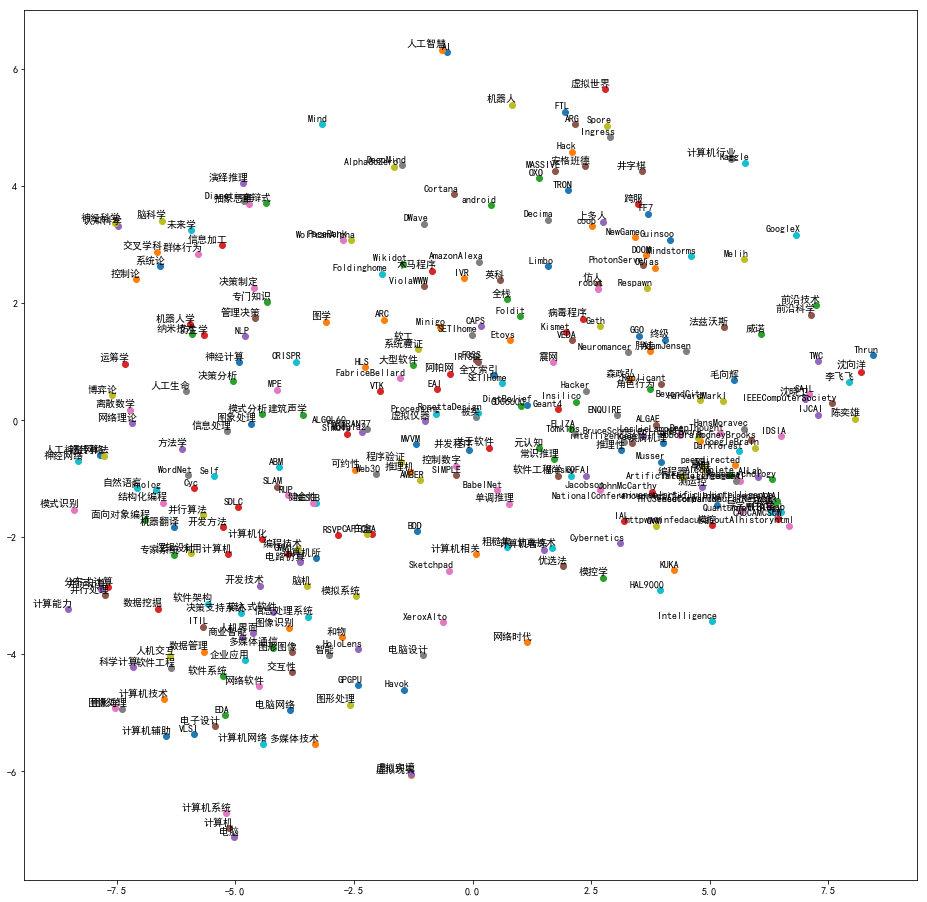

In [22]:
tsne_plot(model,'人工智能')

D:\Design Software\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


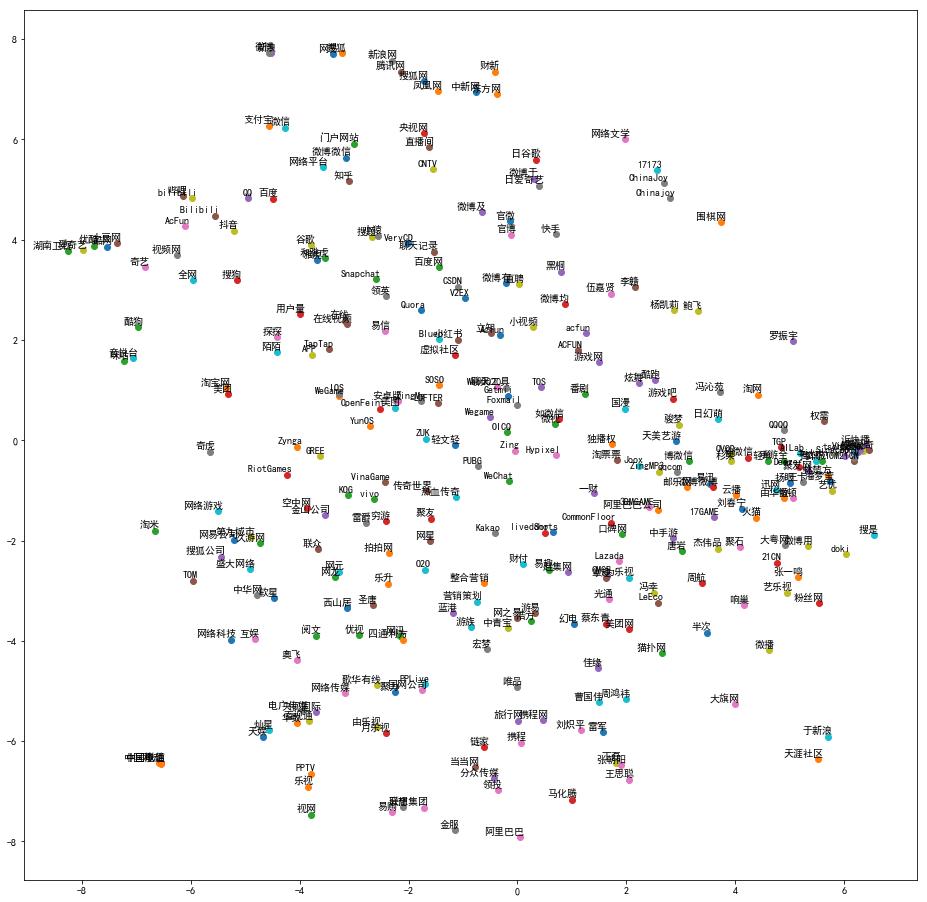

In [24]:
tsne_plot(model,'腾讯')

### 用wordcloud绘制类似的词

In [21]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [29]:
from gensim import models
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
'''
获取一个圆形的mask
'''
def get_mask():
    x,y = np.ogrid[:300,:300]
    mask = (x-150) ** 2 + (y-150)**2 > 130 ** 2
    mask = 255 * mask.astype(int)
    return mask
 
'''
绘制词云
'''
def draw_word_cloud(word_cloud):
    wc = WordCloud(background_color="white",font_path = font,mask= get_mask())
    wc.generate_from_frequencies(word_cloud)
    #隐藏x轴和y轴
    plt.figure(figsize=(15,15))
    plt.axis("off")
    plt.imshow(wc,interpolation="bilinear")
    plt.show()

In [ ]:
model = models.Word2Vec.load("word2vec.model")

In [32]:
one_corpus = ["人工智能"]
result = model.wv.most_similar(one_corpus[0],topn=100)

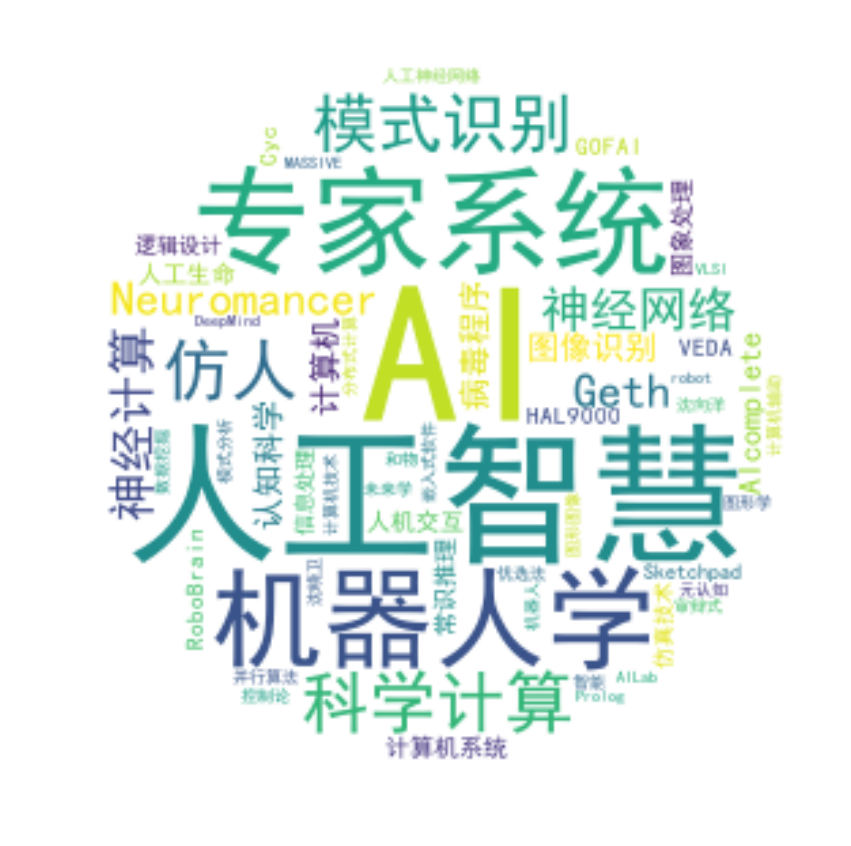

In [33]:
word_cloud = dict()
for sim in result:
    # print(sim[0],":",sim[1])
    word_cloud[sim[0]] = sim[1]
#绘制词云
draw_word_cloud(word_cloud)